# CPL 5559 -B220 - CPL -Applied Project

## Libraries

In [ ]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [ ]:
#for other pyhon modules
import import_ipynb

In [ ]:
import DEF_MFS_MVP_Storage as mDB

## Week 3

## Python Classes

### Define Class to input tickers

In [ ]:
class Ticker:
    
    def get_tickername(self):
        ticker_number=int(input("Enter number of tickers you want"))
        tickers=[]
        for i in range(ticker_number):
            ticker=input("Enter ticker symbol:")
            tickers.append(ticker)
        tickers=" ".join(tickers)
        return tickers
    

### Define class for yahoo finance

In [ ]:
class yfinance:
    
    #constructor to initialize instance variables
    def __init__(self,ticker, start_date,end_date):
        #ticker: stock ticker symbol
        #star_date : start date from when the stock prices is to be extracted
        #end_date : final date upto which the stock prices is to be extracted
        self.ticker=ticker
        self.start=start_date
        self.end=end_date
        
    #instance method to extract stock prices of a any one ticker
    def get_stockmarketdata_indv(self):
        # for individual ticker we use the yf.ticker module
        #yf.Ticker to create a ticker object for a particular ticker
        stock = yf.Ticker(self.ticker)
        #print(stock.info)
        #.history to get historical market data
        stock_df = stock.history(period='1d',start=self.start, end=self.end,actions=False)
        #period ='1d' means we want to extract stock market data once every day between the specified dates
        return stock_df
    
    #instance method to extract stock prices for all specified tickers
    def get_stockmarketdata_all(self):
        #To download the historical data for multiple tickers at once you can use the download module.
        #converting to string
        merged_stock_df = yf.download(self.ticker,period='1d', start=self.start, end=self.end,group_by='tickers')
        return merged_stock_df

        

### Define Class for Displaying and Saving Outputs

In [ ]:
class output:
    #class for displaying output and saving files
    def __init__(self,value,output_name):
        self.value=value
        self.name=output_name
        
    def output_print(self):
        #this function will print values, list, arrays and others
        print(self.value)
        
    def output_display(self):
        #this function will display pandas dataframe as a table
        display(self.value)
        
    def output_savecsv(self):
        #this functuion will save output as csv
        self.value.to_csv(self.name+".csv")
    
    def output_plot(self):
        #this function will make a line plot of all the stock market data
        open_close=self.value
        open_close.reset_index(inplace=True)
        open_close.plot(x="Date", y=["Open","Close"],figsize=(12, 12))
        plt.title("Line plot for open and closed stock market prices for : "+ self.name,fontsize=20)
        plt.xlabel("Date",fontsize=15)
        plt.ylabel("Stock market Data",fontsize=15)
        plt.show()
        

## Main


In [ ]:
#initialize start and end date
start_date = "2021-01-01"
end_date = "2022-12-31"

### Tesla stock prices

In [ ]:
#define a class object
tesla_Data = yfinance("TSLA", start_date, end_date)


In [ ]:
#extract stock data by calling the class's instance method
Tesla=tesla_Data.get_stockmarketdata_indv()

In [ ]:
type(Tesla)

In [ ]:
#show stock data in tabular form by calling class's instance method
Tesla_output=output(Tesla,"Tesla")
Tesla_output.output_display()

In [ ]:
#show lineplot for open and close values
Tesla_output.output_plot()

In [ ]:
#save to csv
Tesla_output.output_savecsv()

### Ford Stock Prices

In [ ]:
#define class object for Ford
ford_Data = yfinance("F", start_date, end_date)

In [ ]:
#extract stock data
Ford=ford_Data.get_stockmarketdata_indv()

In [ ]:
#show stock data in tabular form by calling class's instance method
Ford_output=output(Ford,"Ford")
Ford_output.output_display()

In [ ]:
#show lineplot for open and close values
Ford_output.output_plot()

In [ ]:
#save stock prices to csv
Ford_output.output_savecsv()

### Stock Prices for both Tesla and Ford

In [ ]:
#input tickers using the Ticker class
Tick=Ticker()
tickers=Tick.get_tickername()
print(tickers)

In [ ]:
#define a class object
tesla_ford_Data = yfinance(tickers, start_date, end_date)

In [ ]:
#extract stock data
Tesla_Ford=tesla_ford_Data.get_stockmarketdata_all()

In [ ]:
#show stock data in tabularTesla_Ford form by calling class's instance method
Tsla_ford_output=output(Tesla_Ford,"Tesla_Ford")
Tsla_ford_output.output_display()

In [ ]:
#save stock prices to csv
Tsla_ford_output.output_savecsv()

## Week 4

### Create database, store data to database and fetch data from database

#### Tesla

In [ ]:
#define class object
mongoDB=mDB.MongoDbAtlas()

In [ ]:
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#create database and collection


In [ ]:
#Tesla_collection
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [ ]:
Tesla_collection

In [ ]:
#store the stock price data into the database
mongoDB.store_stockdata(Tesla,Tesla_collection)

Backend at MongoDb Atlas 

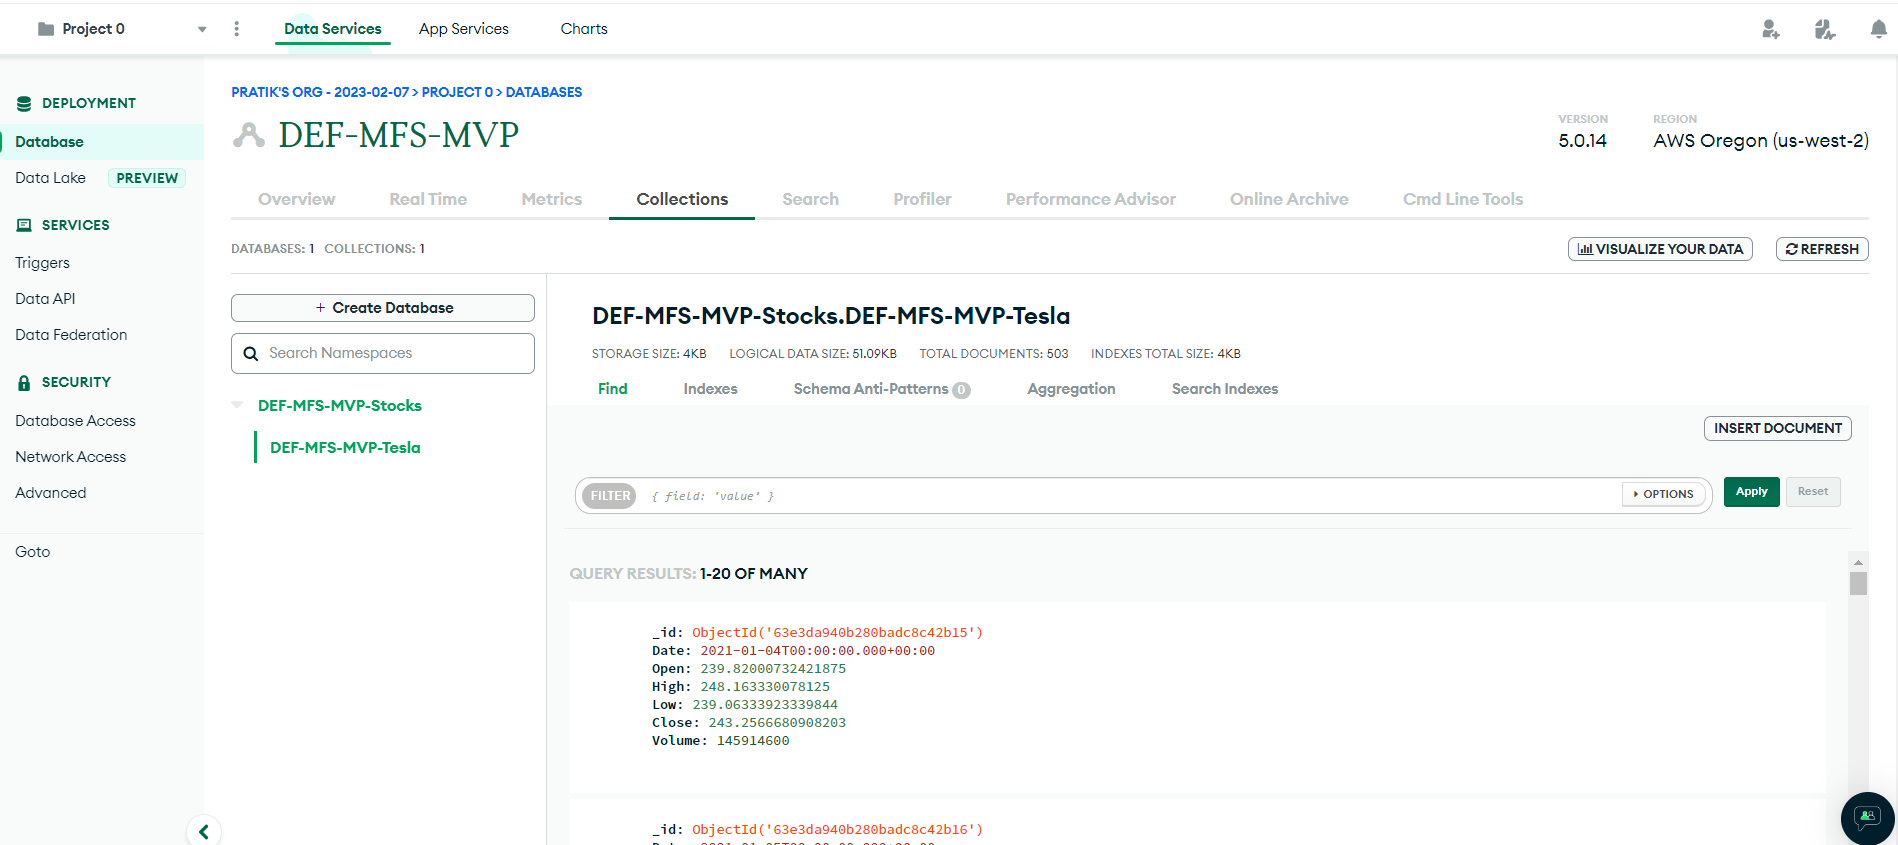

In [ ]:
#retrive stock markey data as list of dictionaries and dataframe
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [ ]:
#dic_from_db

In [ ]:
#df_from_db

In [ ]:
#we use output class
#display the extracted stock market data from MongoDB in a DICTIONARY STRUCTURE
op=output(dic_from_db_tesla,Tesla)
#op.output_display()

In [ ]:
#display the extracted stock market data from MongoDB in a tabular structure.#we use output class
op=output(df_from_db_tesla,Tesla)
op.output_display()

#### Ford

In [ ]:
#create a new collection for ford
Ford_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Ford")

In [ ]:
#store ford stpock market data into database
mongoDB.store_stockdata(Ford,Ford_collection)

Backend at MongoDb Atlas Database

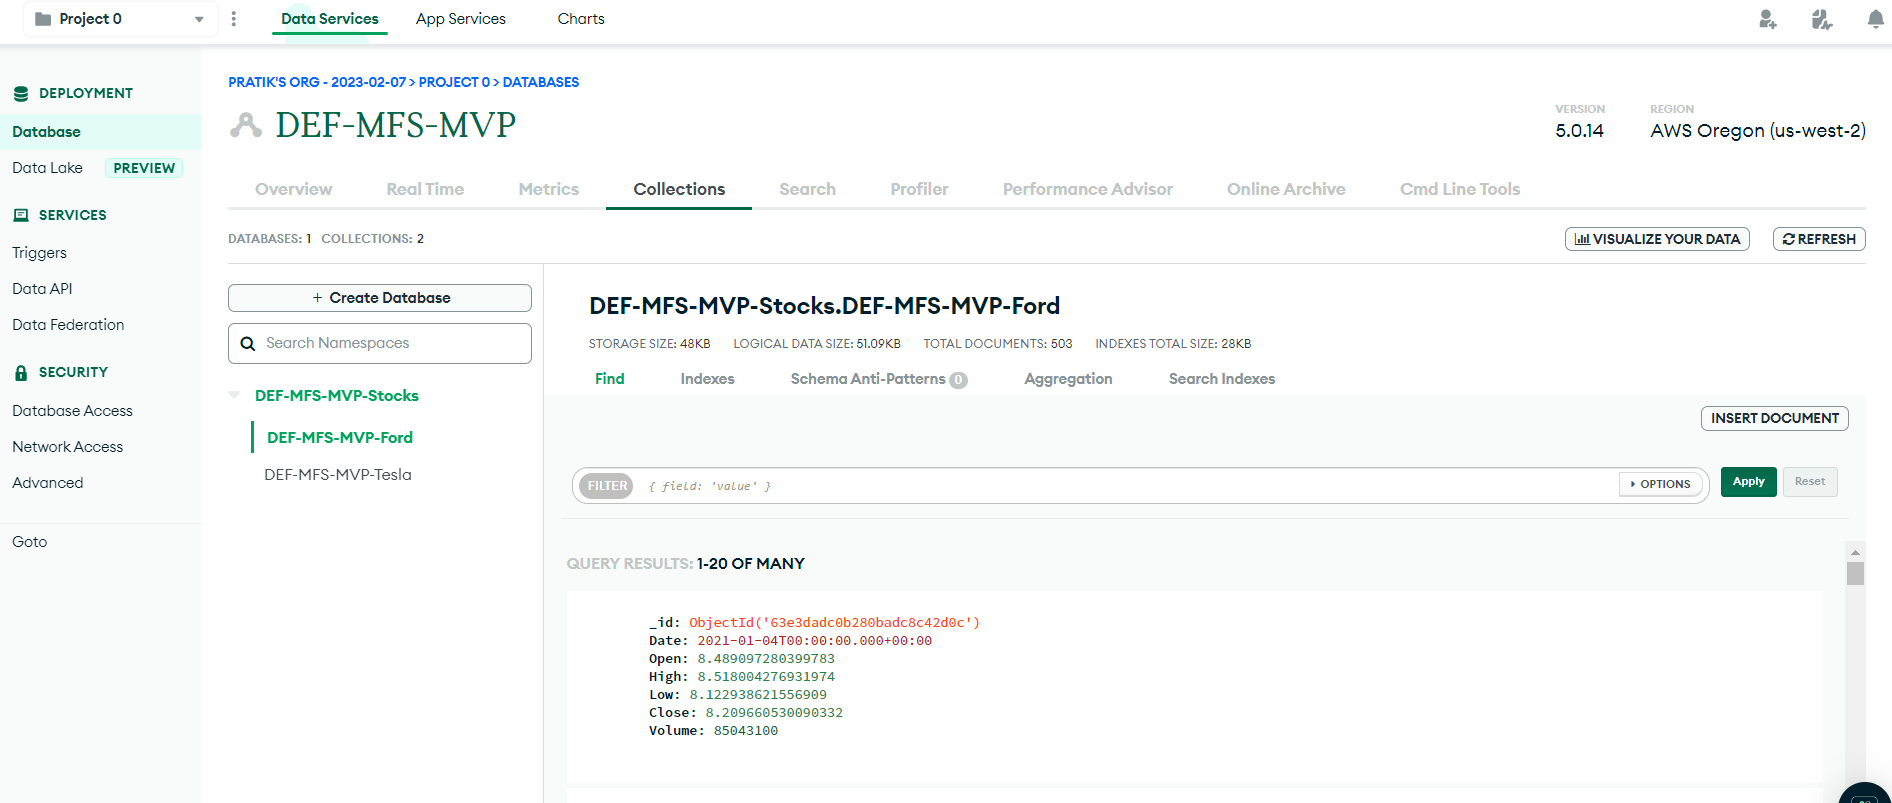

In [ ]:
#retrive stock market data of Ford as list of dictionaries and dataframe
dic_from_db_ford,df_from_db_ford=mongoDB.fetch_dbdata(Ford_collection)

In [ ]:
#display the extracted stock market data from MongoDB in a DICTIONARY STRUCTURE
op=output(dic_from_db_ford,Ford)
#op.output_display()

In [ ]:
#display the extracted Ford stock market data from MongoDB in a tabular structure.
#we use output class
op=output(df_from_db_ford,Ford)
op.output_display()

## Week 5

## Statistical Analysis and Visualization

### Retrieve data from database

In [ ]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [ ]:
#for other python modules to main module/file
import import_ipynb

In [ ]:
import DEF_MFS_MVP_Storage as storage_module

In [ ]:
#define class object for mongoDB storage module class
mongoDB=storage_module.MongoDbAtlas()

In [ ]:
#connect to database

#### For Tesla

In [ ]:
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#connect to tesla database and collection
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [ ]:
Tesla_collection

In [ ]:
#this is the database we connected to in backend

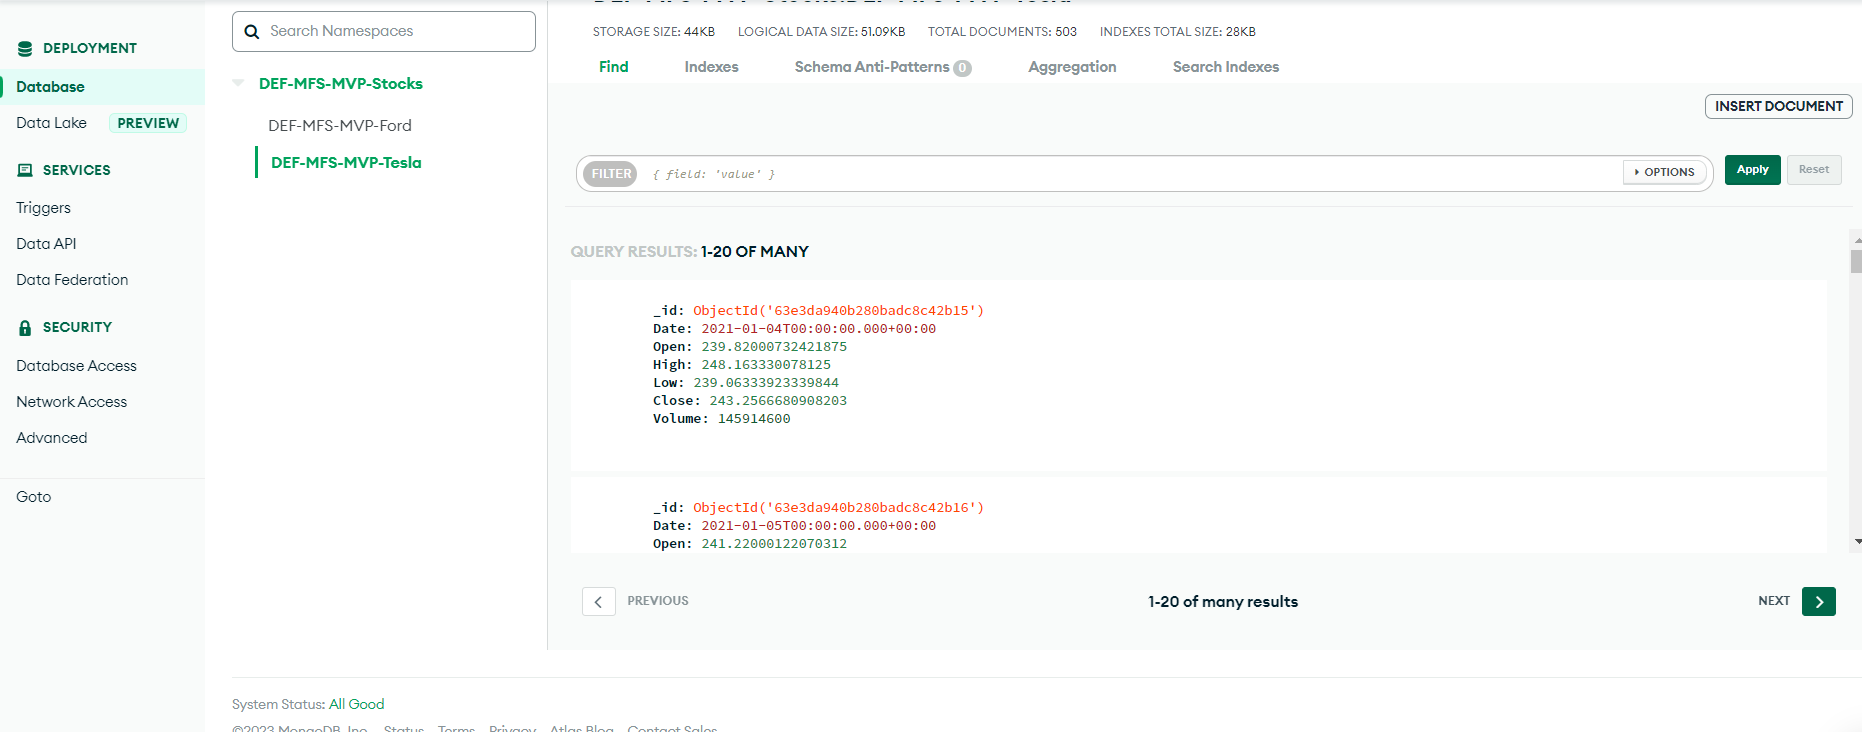

In [ ]:
#retrive stock market data as list of dictionaries and dataframe
#this class was explained in previous task


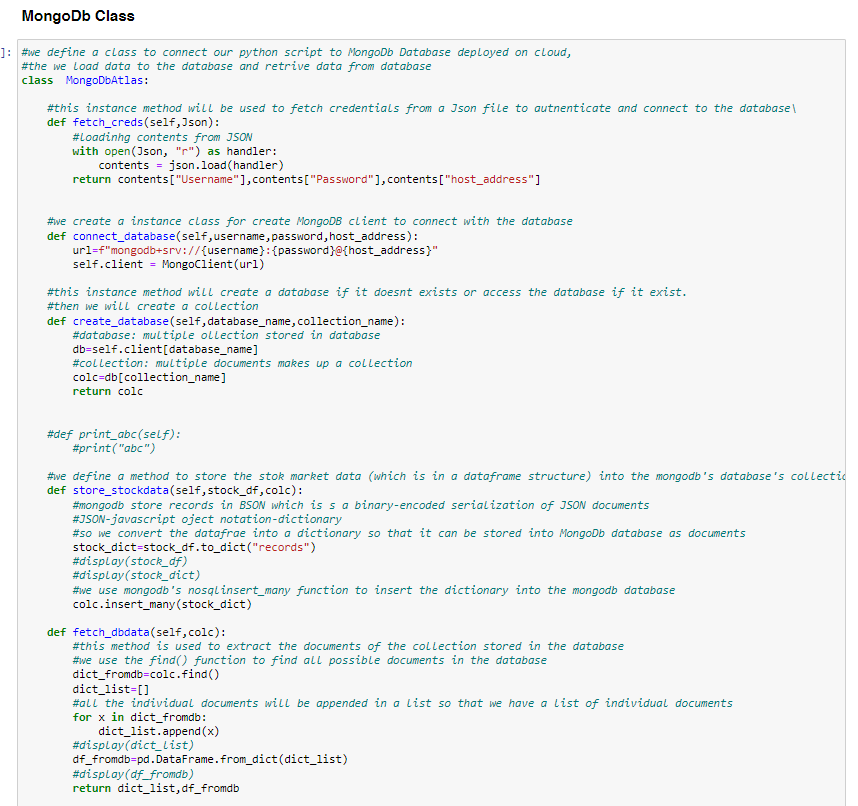

In [ ]:
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [ ]:
df_from_db_tesla

#### For Ford Data


In [ ]:
#access database and collection for ford
Ford_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Ford")

In [ ]:
#fetch data from ford collection
dic_from_db_ford,df_from_db_ford=mongoDB.fetch_dbdata(Ford_collection)

In [ ]:
df_from_db_ford

### Statistical Analysis

We'll be using the DEF_MFS_MVP_StatisticalAnalysis.ipynb to perform statistical analysis on our data and find any anomolies in the data.

In [ ]:
#importying StatisticalAnalysis module on our main DEF_MFS_MVP file
import DEF_MFS_MVP_StatisticalAnalysis as statistical_module

In [ ]:
#create a class object to find outliers and missing values
anom=statistical_module.Find_Anomolies(df_from_db_tesla)
anom

#### Finding Null Values

In [ ]:
#we use check_null() function of Find_Anomolies class to check for any missing values
anom.check_null()

#### From the above analysis, we see that there arent any missing values or Nan values in our stock market data.

#### Finding Outliers

In [ ]:
#first we define the target features for which we will compute the outliers for
#our list of target features are
target_features=[ 'Open', 'High', 'Low', 'Close', 'Volume']
target_features

In [ ]:
#find outliers for each target features
for i in target_features:
    anom.check_outliers(i)

#### Compute Statistical Characters

#### OPEN

In [ ]:
#we create class object for Statistical_character class to perform statistical analysis on different target features of our stock market data
OPEN=statistical_module.Statistical_character(df_from_db_tesla,"Open")
#describe feature target values
OPEN.calculate_statistic()

In [ ]:
#calculate minimum values
OPEN.calculate_min()
#calculate maximum values
OPEN.calculate_max()
#calculate range
OPEN.calculate_range()
#calculate mean of Open values
OPEN.calculate_mean()
#calculate median
OPEN.calculate_median()
#calculate variance
OPEN.calculate_variance()
#calculate standard deviation
OPEN.calculate_stddev()

In [ ]:
#statistical character in tabular structure
OPEN.stats_table()

In [ ]:
#we define a function to compute statistical values for each target features

def Descriptive_Statistics(target_feature,data_frame):
    #we create class object for Statistical_character class to perform statistical analysis on different target features of our stock market data
    stat=statistical_module.Statistical_character(data_frame,target_feature)
    #describe feature target values
    stat.calculate_statistic()
    #calculate minimum values
    stat.calculate_min()
    #calculate maximum values
    stat.calculate_max()
    #calculate range
    stat.calculate_range()
    #calculate mean 
    stat.calculate_mean()
    #calculate median
    stat.calculate_median()
    #calculate variance
    stat.calculate_variance()
    #calculate standard deviation
    stat.calculate_stddev()
    #statistical character in tabular structure
    stat.stats_table()

#### Open

In [ ]:
Descriptive_Statistics("Open",df_from_db_tesla)

#### Close

In [ ]:
Descriptive_Statistics("Close",df_from_db_tesla)

#### High

In [ ]:
Descriptive_Statistics("High",df_from_db_tesla)

#### Low

In [ ]:
Descriptive_Statistics("Low",df_from_db_tesla)

#### Volume

In [ ]:
Descriptive_Statistics("Volume",df_from_db_tesla)

#### Similarly for Ford

In [ ]:
#create a class object to find outliers and missing values
anom_F=statistical_module.Find_Anomolies(df_from_db_ford)
anom_F

In [ ]:
#finding outliers for ford stock market prices
#we use check_null() function of Find_Anomolies class to check for any missing values
anom_F.check_null()

In [ ]:
#find outliers for each target features
for i in target_features:
    anom_F.check_outliers(i)

In [ ]:
#calculate statistical characters for FORD data

Open Prices

In [ ]:
Descriptive_Statistics("Open",df_from_db_ford)

Close Price

In [ ]:
Descriptive_Statistics("Close",df_from_db_ford)

High Price

In [ ]:
Descriptive_Statistics("High",df_from_db_ford)

Low Price

In [ ]:
Descriptive_Statistics("Low",df_from_db_ford)

Stock Volumes

In [ ]:
Descriptive_Statistics("Volume",df_from_db_ford)

### Visualization

We'll be using the DEF_MFS_MVP_Visualization.ipynb to visualize the data as time series and plot them with the x-axes as time and the y-axis as the target feature.

In [ ]:
#importying Visualization module on our main DEF_MFS_MVP file
import DEF_MFS_MVP_Visualization as visual_module

#### For Tesla Data

In [ ]:
#create a class object to find outliers through boxplots
box_plot=visual_module.Boxplot_Outliers(df_from_db_tesla)
box_plot.plot_boxplots()

Any datapoints outside the upper and lower whiskers are outliers.

In [ ]:
#create a class object to plot time series graph of our data
ts_plot=visual_module.timeseries_plot(df_from_db_tesla)
ts_plot

In [ ]:
#display timeseries plot for all the target features- OPEN,CLOSE,HIGH and LOW
ts_plot.static_lineplots_all()

In [ ]:
#display time series plot for individul target features
ts_plot.static_lineplot_indv()

In [ ]:
#display interactive plots for all stock market data price
ts_plot.interactive_lineplots_all()

In [ ]:
#display interactive line plots for CLOSE stock market price
ts_plot.interactive_lineplots_close()

#### For Ford Stock Prices

In [ ]:
#create a class object to plot time series graph of our ford data
ts_plot_F=visual_module.timeseries_plot(df_from_db_ford)
ts_plot_F

In [ ]:
#display timeseries plot for all the target features- OPEN,CLOSE,HIGH and LOW
ts_plot_F.static_lineplots_all()

In [ ]:
#display time series plot for individul target features
ts_plot_F.static_lineplot_indv()

In [ ]:
#display interactive plots for all stock market data price
ts_plot_F.interactive_lineplots_all()

In [ ]:
#display interactive line plots for CLOSE stock market price
ts_plot_F.interactive_lineplots_close()

## Week 6

## Interactive Visualization with Plotly and Dash

## Libraries

In [ ]:
#to work with dataframe
import pandas as pd
#to perform mathematical and statistical calculations
import numpy as np

#for interactive graphs/visualization
#plotly express
import plotly.express as px
#plotly graphical object
import plotly.graph_objects as go
#to work with dashboards
from jupyter_dash import JupyterDash
#import dash core components
from dash import dcc
from dash.dependencies import Input,Output
#to create html objects
from dash import html

### Fetch data from persistent storage

In [ ]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [ ]:
#for other python modules to main module/file
import import_ipynb

In [ ]:
#import storage module to main module
import DEF_MFS_MVP_Storage as storage_module

In [ ]:
#define class object for mongoDB storage module class
mongoDB=storage_module.MongoDbAtlas()

In [ ]:
#connect to mongodb database 
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#connect to tesla database and collection
#for Tesla database
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [ ]:
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [ ]:
dic_from_db_tesla

In [ ]:
df_from_db_tesla

In [ ]:
#for ford database
Ford_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Ford")

In [ ]:
dic_from_db_ford,df_from_db_ford=mongoDB.fetch_dbdata(Ford_collection)
df_from_db_ford

In [ ]:
dic_from_db_ford

### Plotly Visualizations on Jupyter Notebook

In [ ]:
#import plotly visualization module to main module
import DEF_MFS_MVP_Interactive_Visualizations as plotly_module

#### For Tesla

In [ ]:
#we create a class object
IP=plotly_module.InteractivePlotly(df_from_db_tesla)

In [ ]:
#to plot line gragh containing all target features

In [ ]:
IP.interactive_line_all()

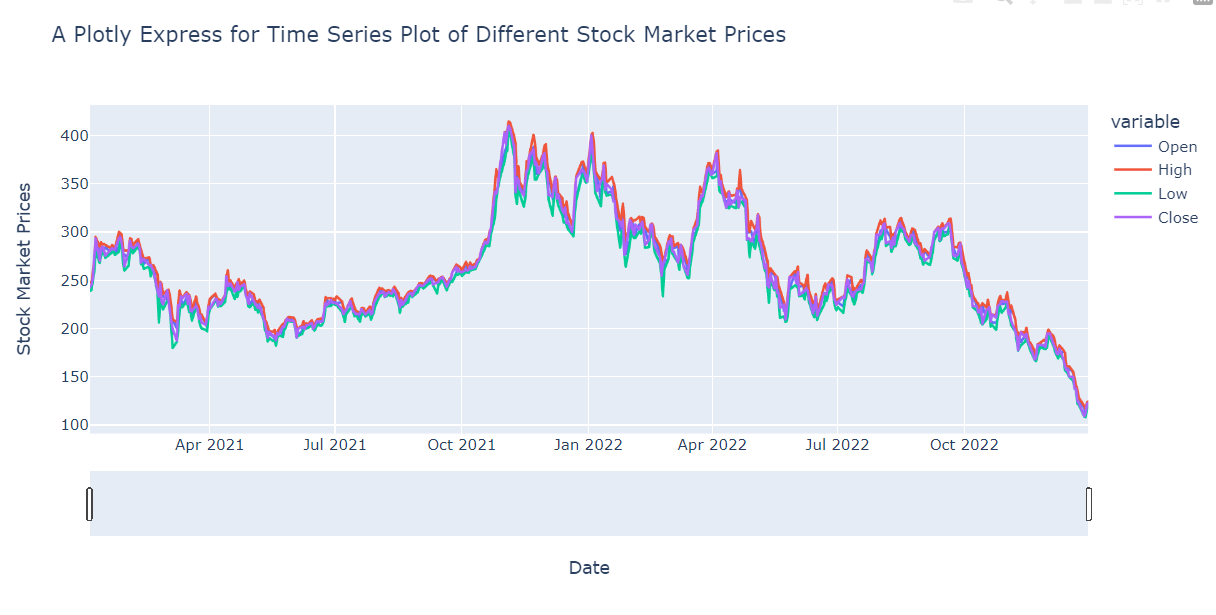

In [ ]:
#to plot individual feature target
IP.interactive_line_indv()

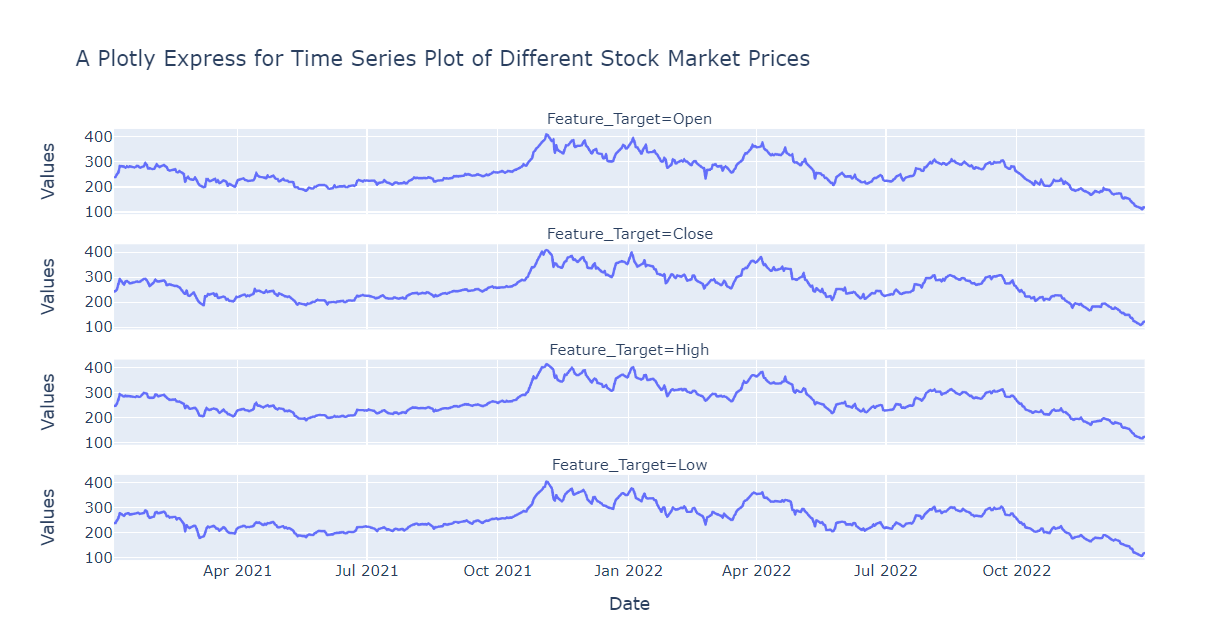

In [ ]:
#plot interactive candlestick plot showing all open, high, low and close stock market values
IP.interactive_candlestick()

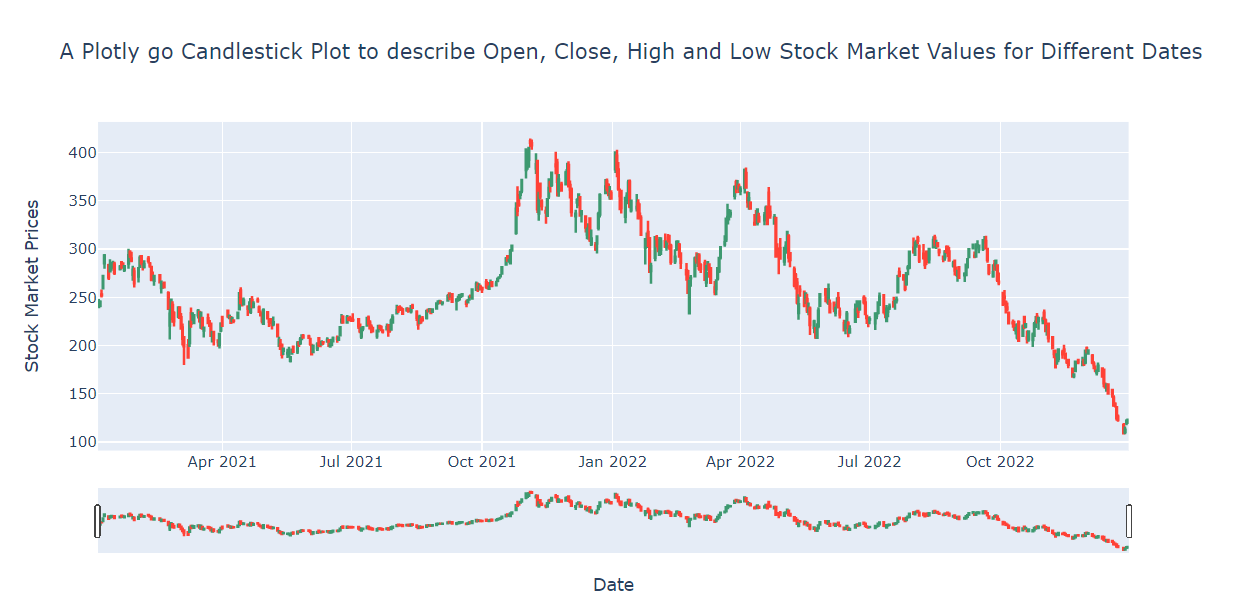

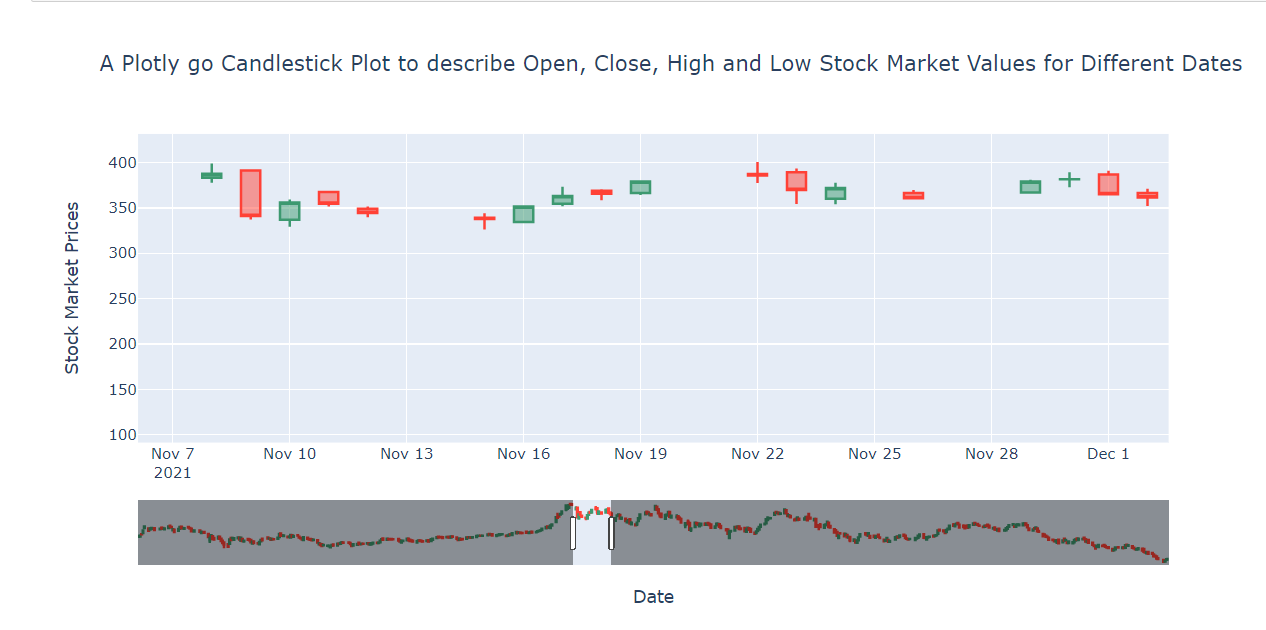

In [ ]:
#plot interactive OHLC plot showing all open, high, low and close stock market values
IP.interactive_OHLC()

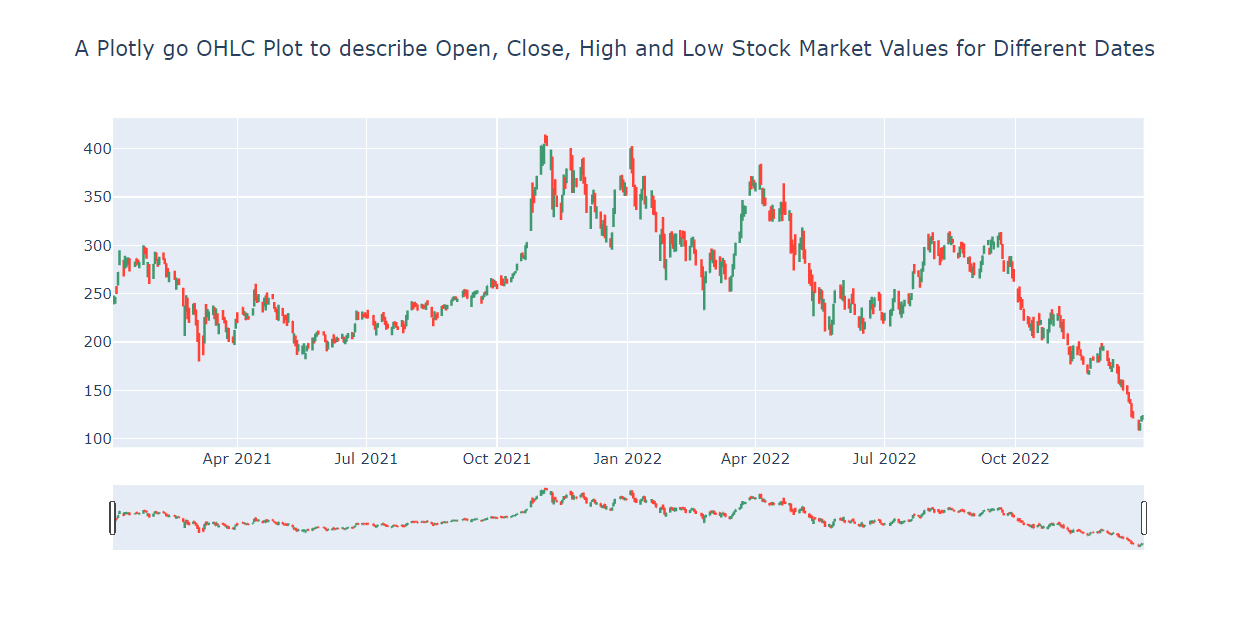

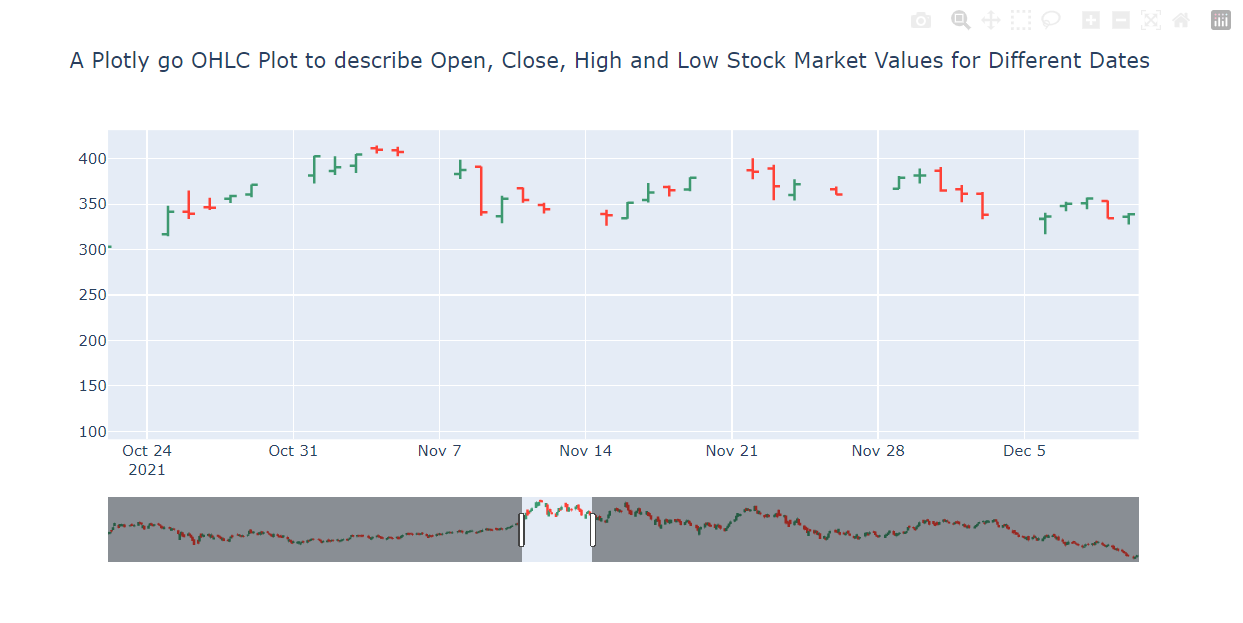

#### For Ford

In [ ]:
#we create a class object
IP=plotly_module.InteractivePlotly(df_from_db_ford)

In [ ]:
IP.interactive_line_all()

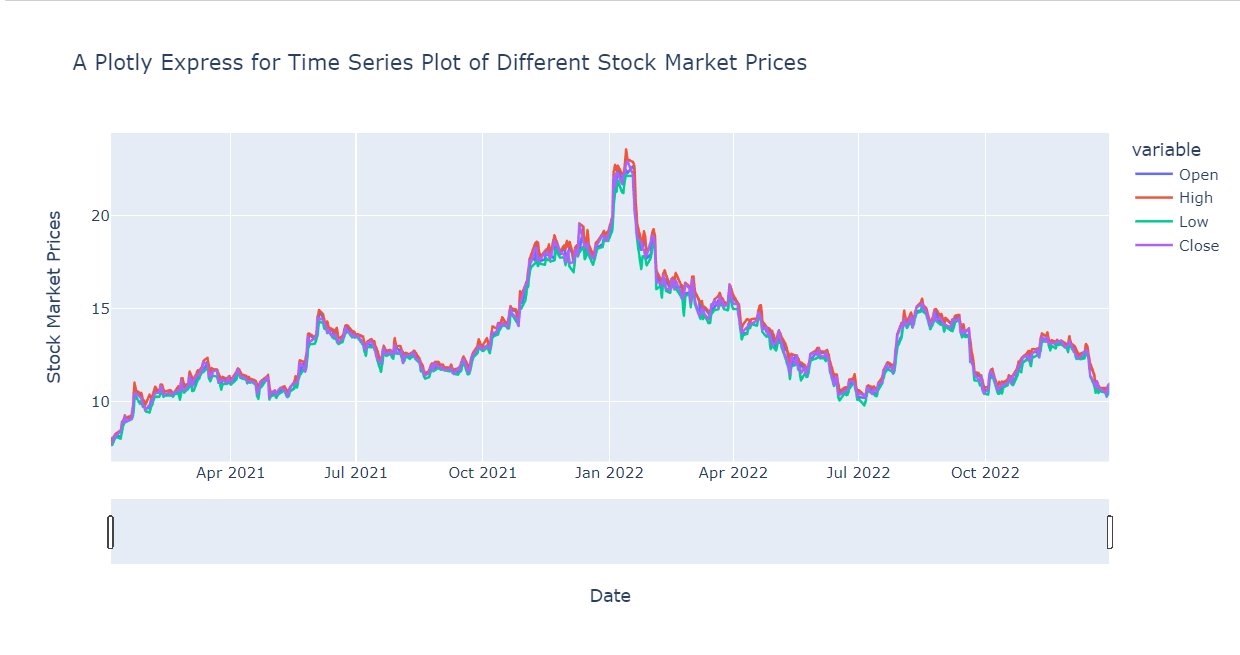

In [ ]:
IP.interactive_line_indv()

In [ ]:
IP.interactive_OHLC()

In [ ]:
IP.interactive_candlestick()

### Plotly Visualization on Dash Dashboard with Interactive Dropdowns and Checklist

In [ ]:
class Dash_Dashboard():
    #we want ti inherit the wide_to_long() function from the wideformat_to_longformat class
    
    #class constructor
    def __init__(self,dataframe):
        self.df=dataframe
        #self.feat_columns=target_features
        
        
    #this instance method is used to create simple lineplots on dash dashboard
    def Dash_lineplot(self):
        #constructor for creating the dash application
        app = JupyterDash(__name__)
        #set app title
        app.title="Stock market Values according to Time"
        fig = px.line(self.df, x='Date', y=["Open","High","Low","Close"])
        fig.update_layout(template="plotly_dark")
        #layout of the dash app describes what the app looks like
        #layout is hierarchial tree of components
        # The dash HTML library provides classes for all of the HTML tags and the keyword arguments describe the HTML attributes
        #like style, class name, and ID.
        #html.Div-our main container
        app.layout=html.Div(
        id="app-container",
        children=[
            #html header
            html.H1("Stock market Values according to Time",style={'text-align':'center'}),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            html.P("Unit is in USD"),
            # dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            dcc.Graph(figure=fig)
        ])
        
        app.run_server(debug=True,port=8051)    
    
        
        
        
    #this class instance function will let us choose and plot line graphs for different stock values- Open, High, Low and Close
    #using dropdowns
    def Dash_dropdown_OHLC(self):
        
        #constructor for creating the dash application
        app = JupyterDash(__name__)
        #set app title
        app.title="Stock market Values according to Time"
        #layout of the dash app describes what the app looks like
        #layout is hierarchial tree of components
        # The dash HTML library provides classes for all of the HTML tags and the keyword arguments describe the HTML attributes
        #like style, class name, and ID.
        #html.Div-our main container
        app.layout = html.Div([
            #html header
            html.H4('Open High Low and Close Stock Market Values in Dash',style={'text-align':'center'}),
            # dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            dcc.Graph(id="time-series-chart"),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            html.P("Select Values:"),
            #to render user expandable dropdown menu in dash
            dcc.Dropdown(
                id="Stock_value",
                options=["Open", "High", "Low","Close"],
                value="Open",
                clearable=False,
            ),
        ])
        #to allow interactivity in dash, we use callback
        #connects dash components with graphs
        #callback function are automatically called by Dash whenever an input component's property changes in order to update 
        #output component.
        @app.callback(
            #output element
        Output("time-series-chart", "figure"), 
            #input element
            #Whenever an input property changes, the callback function will get called automatically. 
            #Dash passes  the new value of the input to the callback function and updates the property of the output component
            #with whatever gets returned by the function. 
        Input("Stock_value", "value"))
        def display_time_series(Stock_value):
            fig = px.line(self.df, x='Date', y=Stock_value)
            fig.update_layout(
            template="plotly_dark")
            return fig

        #to run dash server
        #debug=True for debugging features
        app.run_server(debug=True,port=8051)
    
    #this instance class will let us pick stock market values to be displayed on our figures using Dash's Checklist
    def DASH_checklist_OHLC(self):
        
        #constructor for creating the dash application
        app = JupyterDash(__name__)
        #set app title
        app.title="Stock market Values according to Time"
        #layout of the dash app describes what the app looks like
        #layout is hierarchial tree of components
        # The dash HTML library provides classes for all of the HTML tags and the keyword arguments describe the HTML attributes
        #like style, class name, and ID.
        #html.Div-our main container
        app.layout = html.Div([
            #html header
            html.H4('Open High Low and Close Stock Market Values in Dash',style={'text-align':'center'}),
            # dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            dcc.Graph(id="time-series-chart"),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            html.P("Select Values:"),
            dcc.Checklist(
                #we define a list of options to choose from
                options=[
                    {"label": "Open", "value": "Open"},
                    {"label": "High", "value": "High"},
                    {"label": "Low", "value": "Low"},
                    {"label": "Close", "value": "Close"},
                ],
                value=["Open"],
                id="checklist",
            ),
        ])
        @app.callback(
        Output("time-series-chart", "figure"),
        Input("checklist", "value"),
        )
        def update(checklist):
                fig = px.line(self.df,x="Date",y=checklist)
                return fig
        app.run_server(debug=True,port=8051)
        
        
    #this function is used to plot interactive candlestick plot where you will have the option to use a range slider    
    def DASH_candlestick(self):
        
        app = JupyterDash(__name__)
        
        app.layout = html.Div([
            html.H4('Candlestick chart',style={'text-align':'center'}),
            dcc.Checklist(
                id='toggle-rangeslider',
                options=[{'label': 'Include Rangeslider', 
                          'value': 'slider'}],
                value=['slider']
            ),
            dcc.Graph(id="graph"),
        ])
        
        @app.callback(
            Output("graph", "figure"), 
            Input("toggle-rangeslider", "value"))
        def display_candlestick(value):
            fig = go.Figure(go.Candlestick(
                x=self.df['Date'],
                open=self.df['Open'],
                high=self.df['High'],
                low=self.df['Low'],
                close=self.df['Close']
            ))

            fig.update_layout(
                xaxis_rangeslider_visible='slider' in value
            )

            return fig


        app.run_server(debug=True,port=8051)

#### For Tesla

In [ ]:
#we create a class object
DASH=Dash_Dashboard(df_from_db_tesla)

In [ ]:
#create interactive lineplot on Dash Dshboard
DASH.Dash_lineplot()

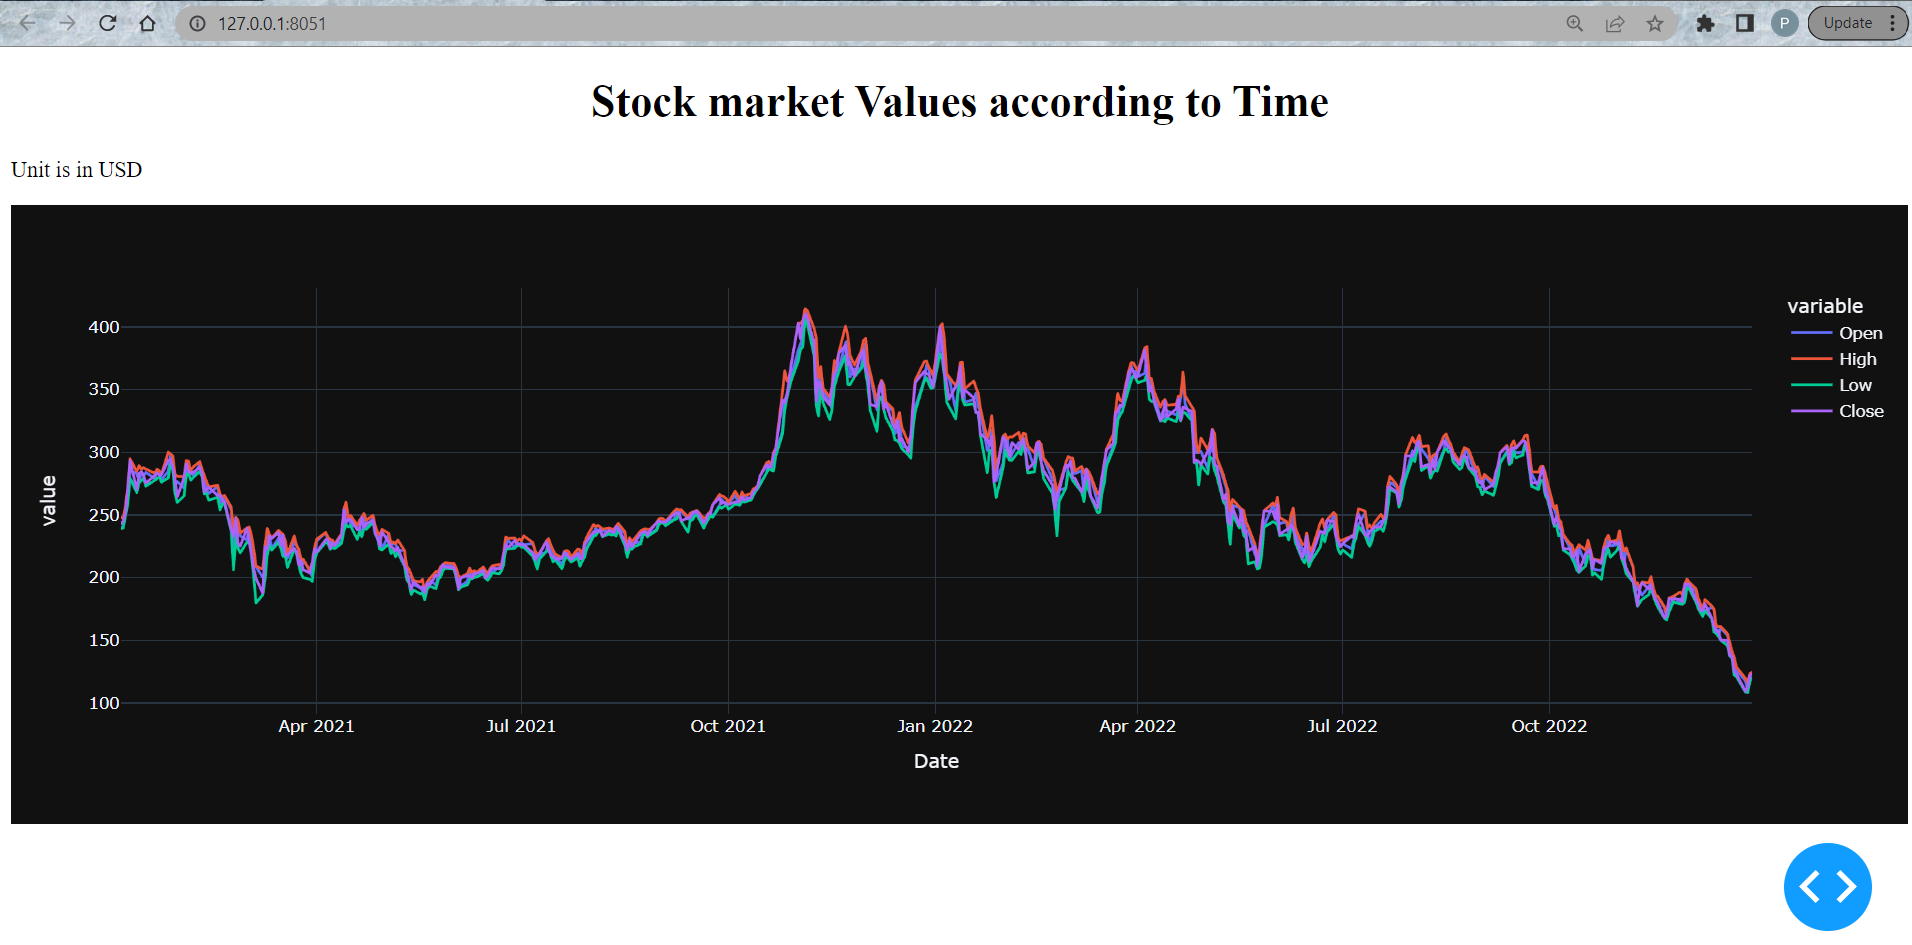

In [ ]:
#create interactive line plot with dropdown menu for selecting between different target features
DASH.Dash_dropdown_OHLC()

Default value when app starts

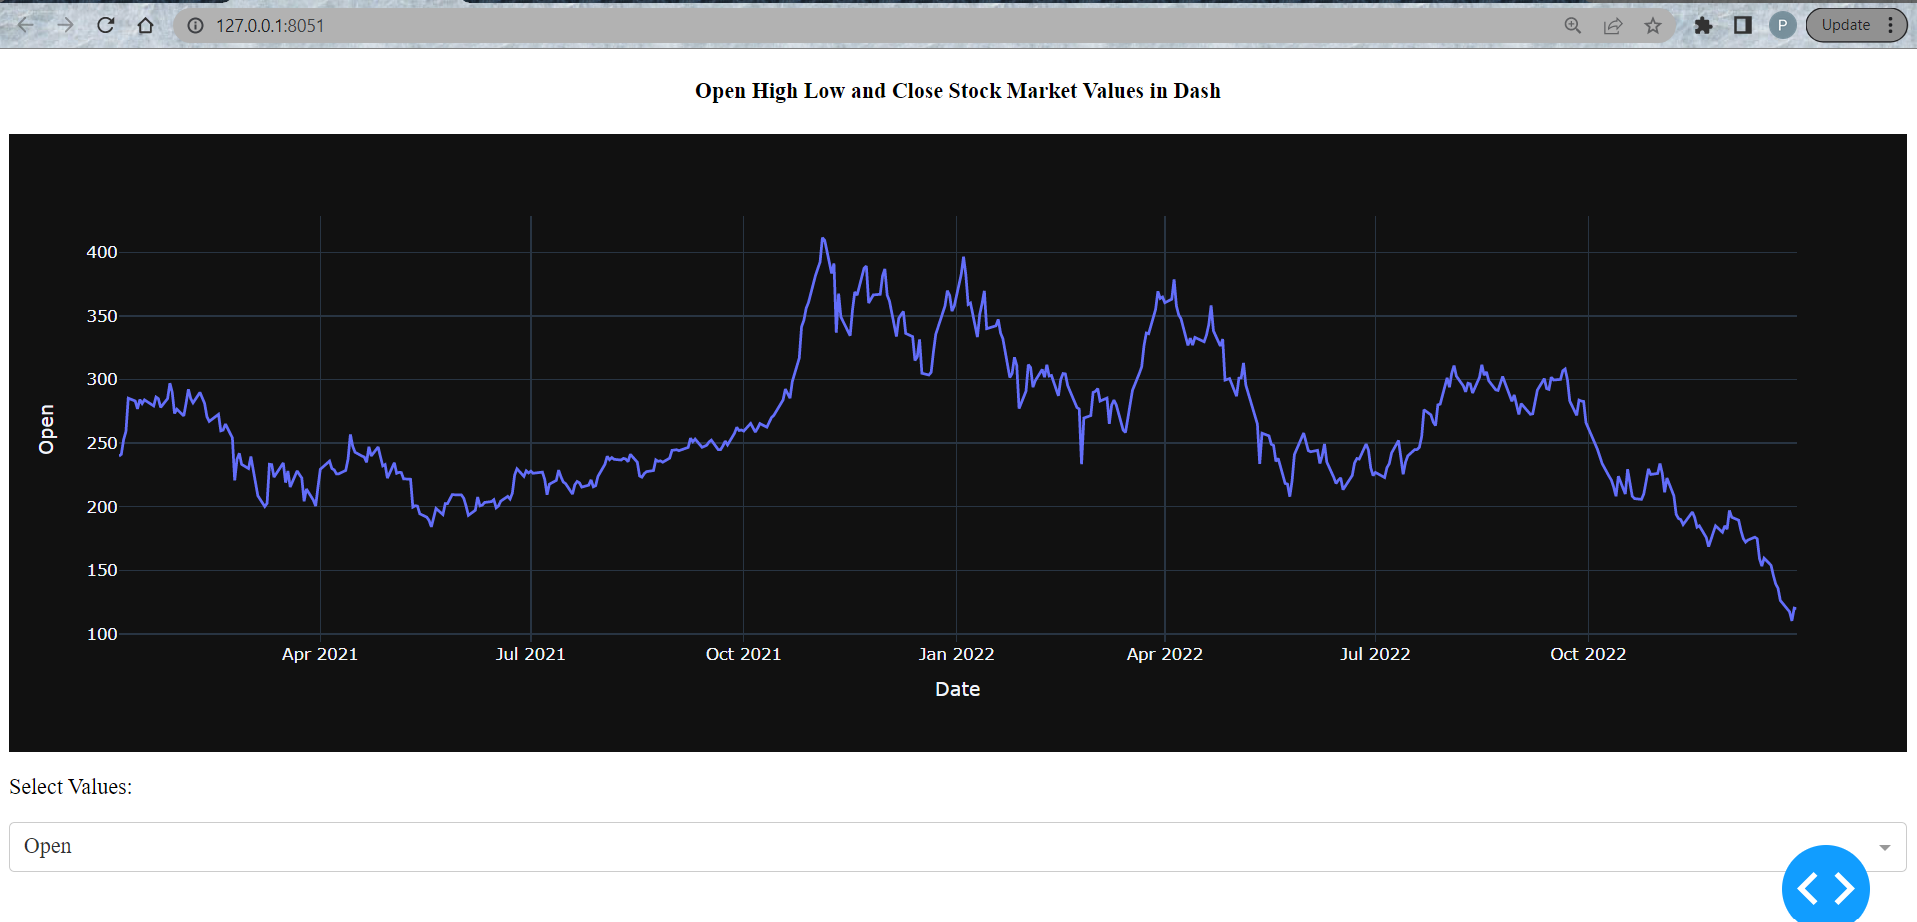

Selecting High from the dropdown menu

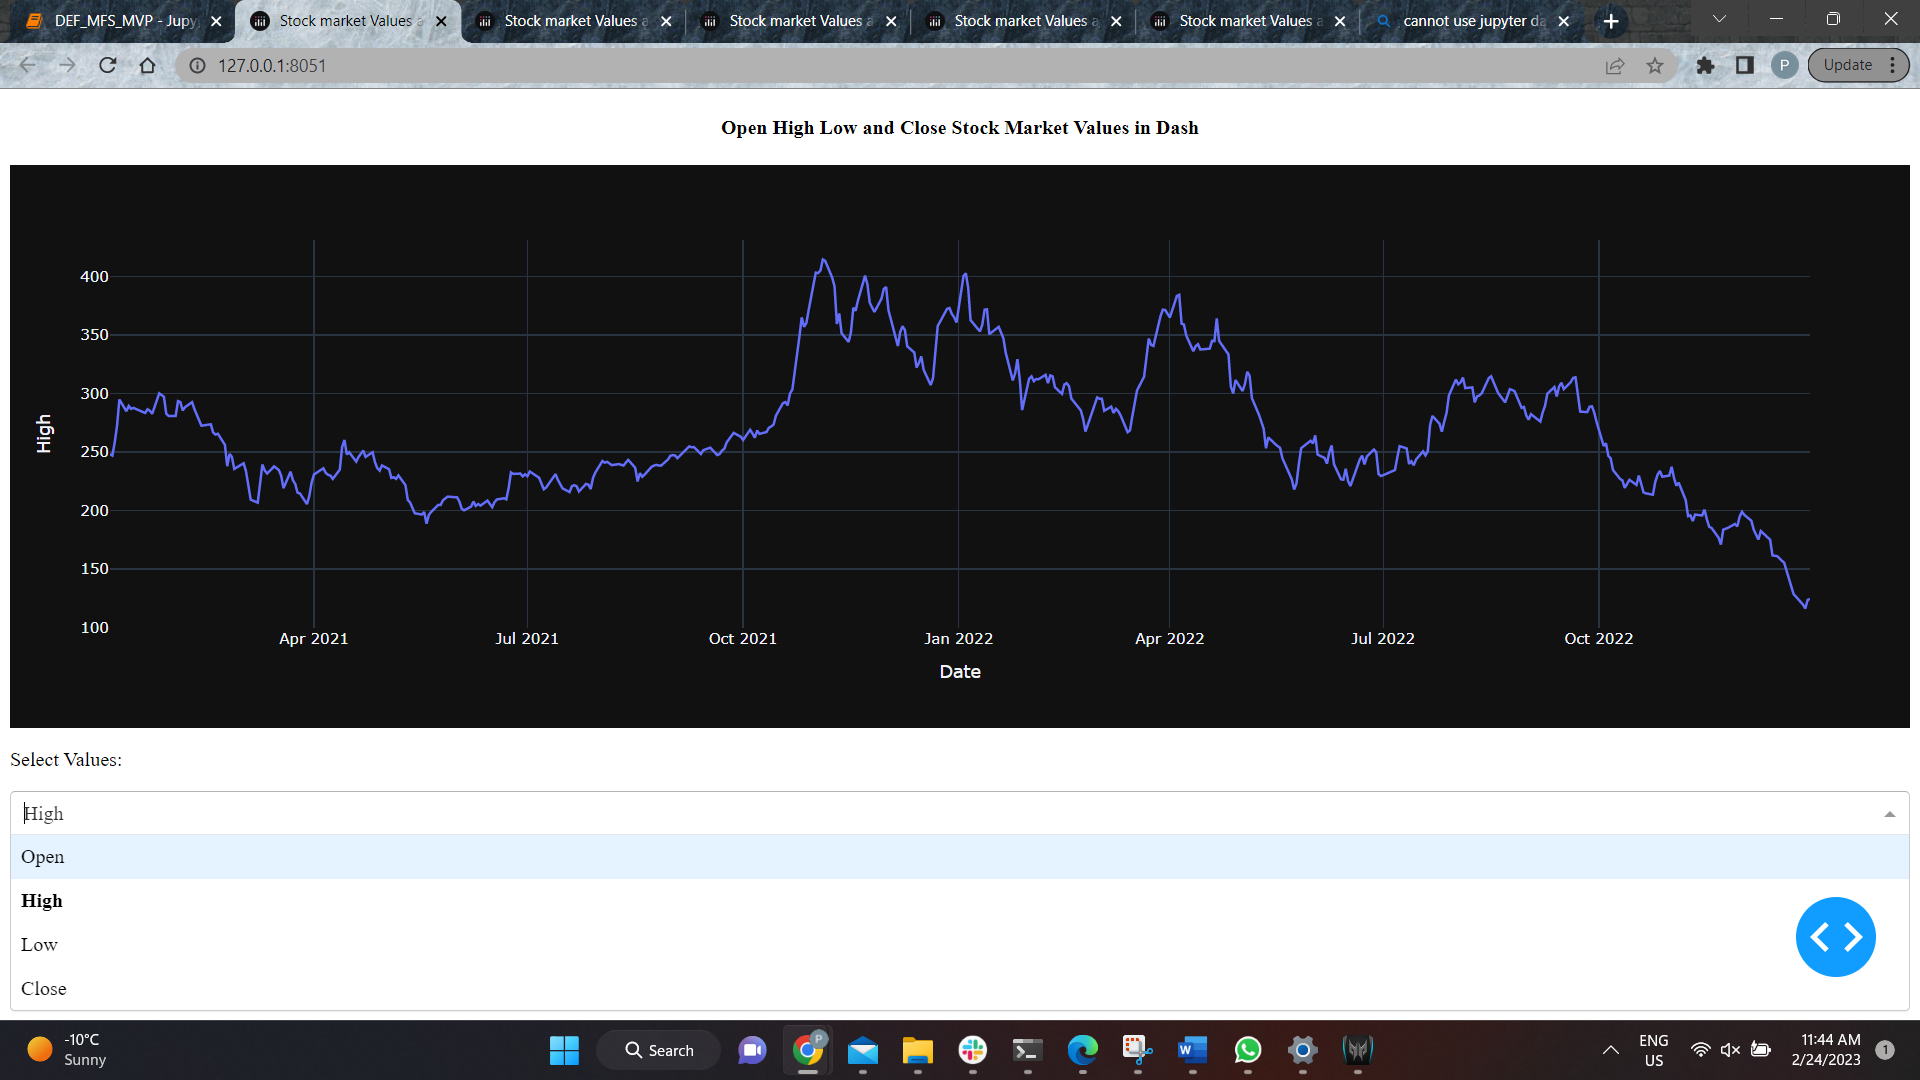

In [ ]:
#create interactive line plot with checklist such that plots for target feature will be displayed based on the options selected
DASH.DASH_checklist_OHLC()

Lineplot on Dash when app is stated and Open values displayed in default

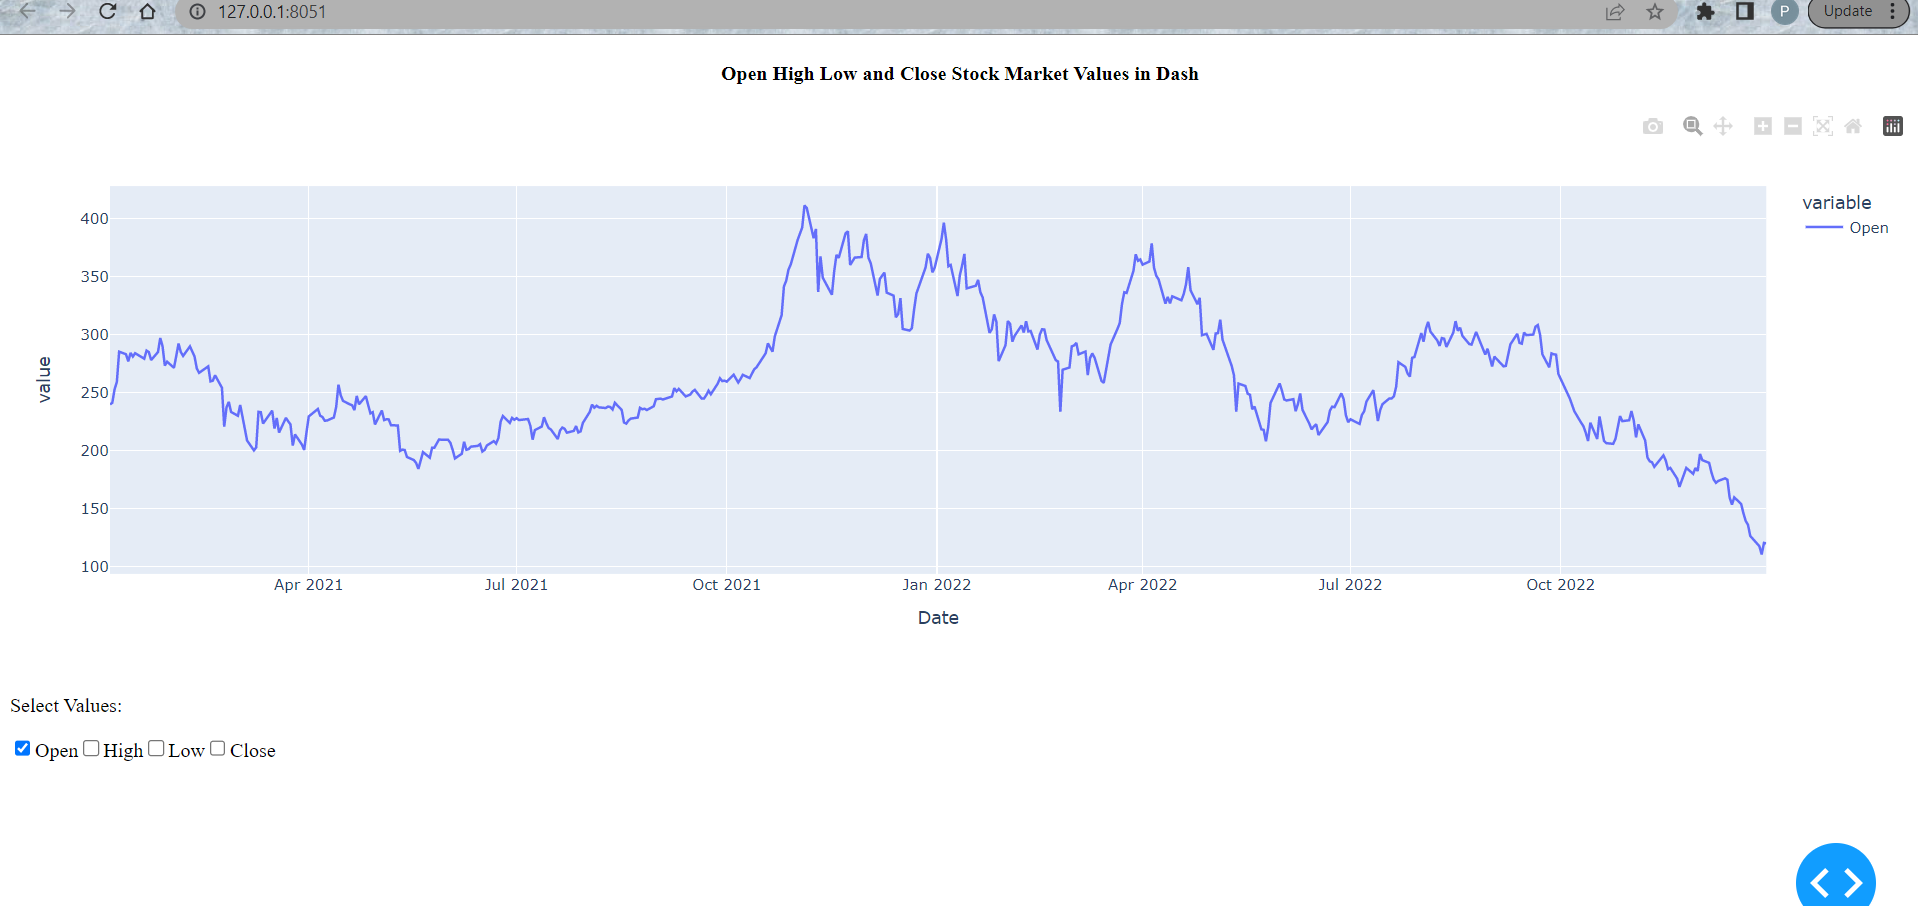

When checklist options Open, Close and Low selected

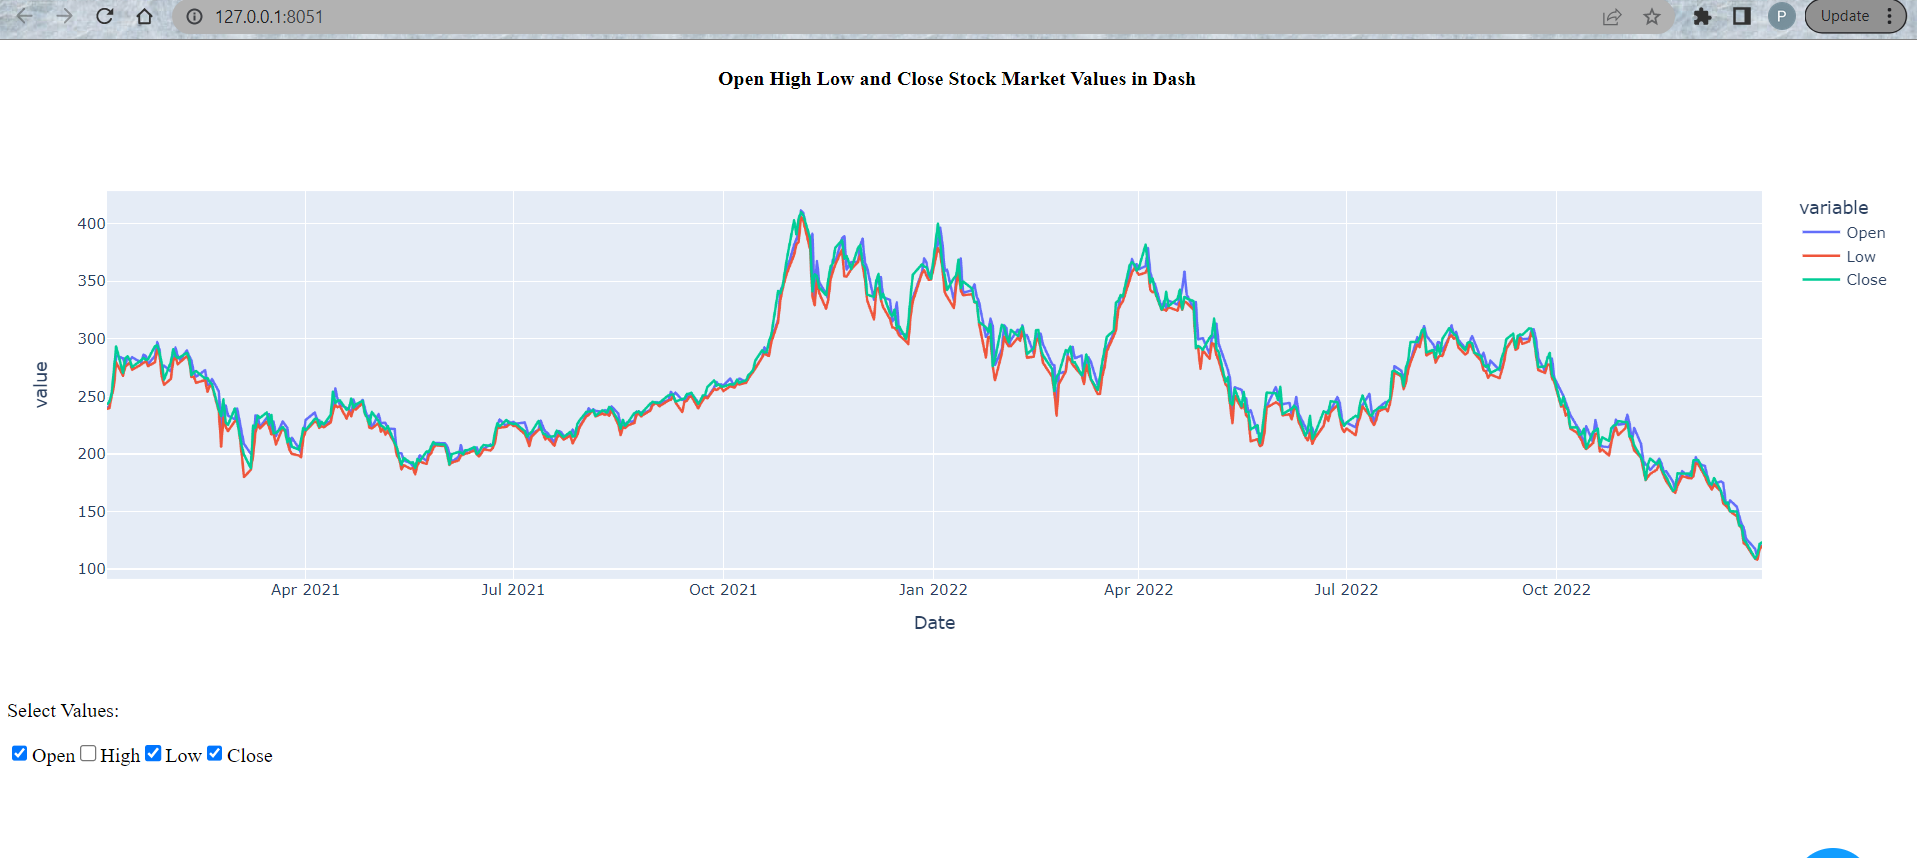

In [ ]:
#create candlestick graph to display open, high, low and close values with options to toggle range slider on and off

In [ ]:
DASH.DASH_candlestick()

Candlestick chart with rangesider checked on default

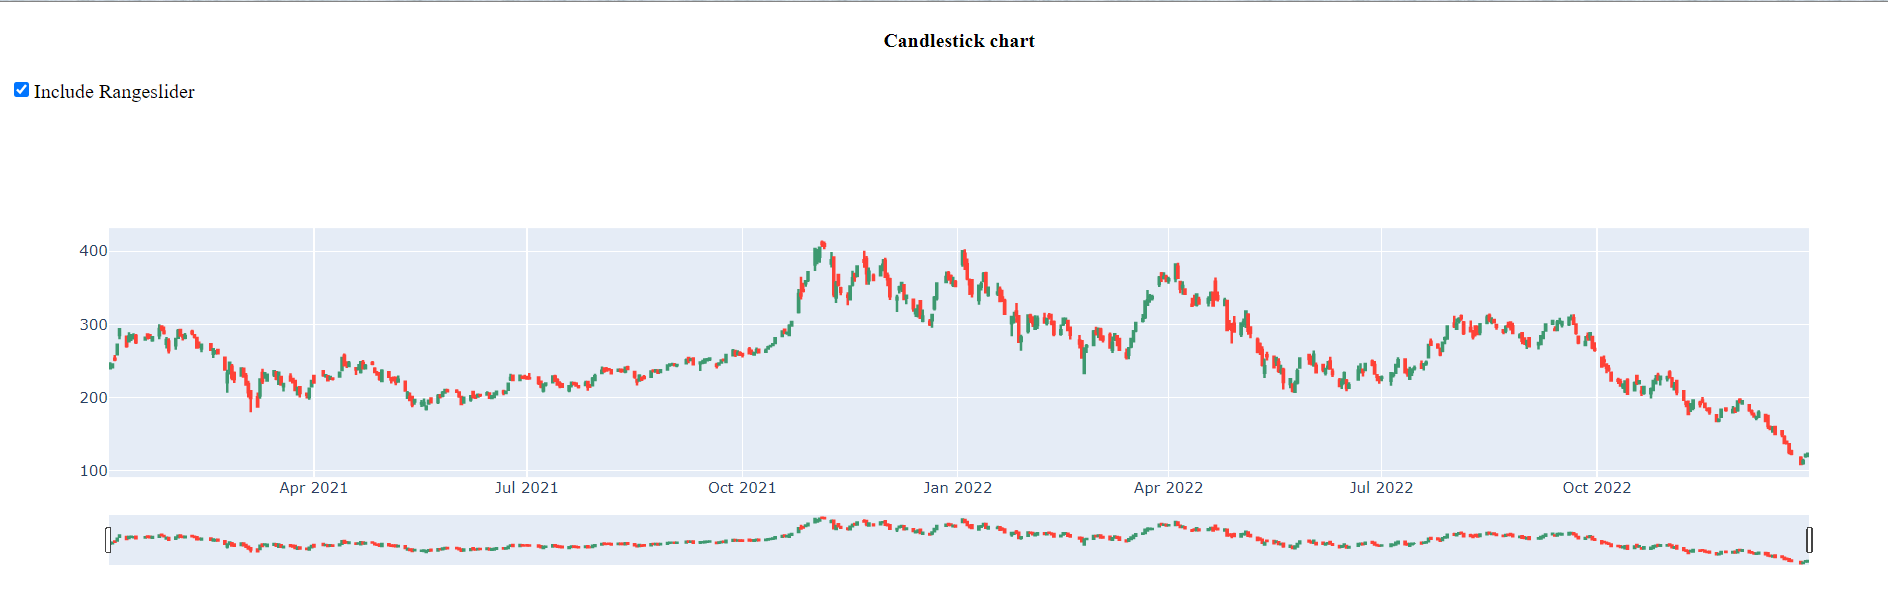

Candlestick chart with rangeslider unchecked


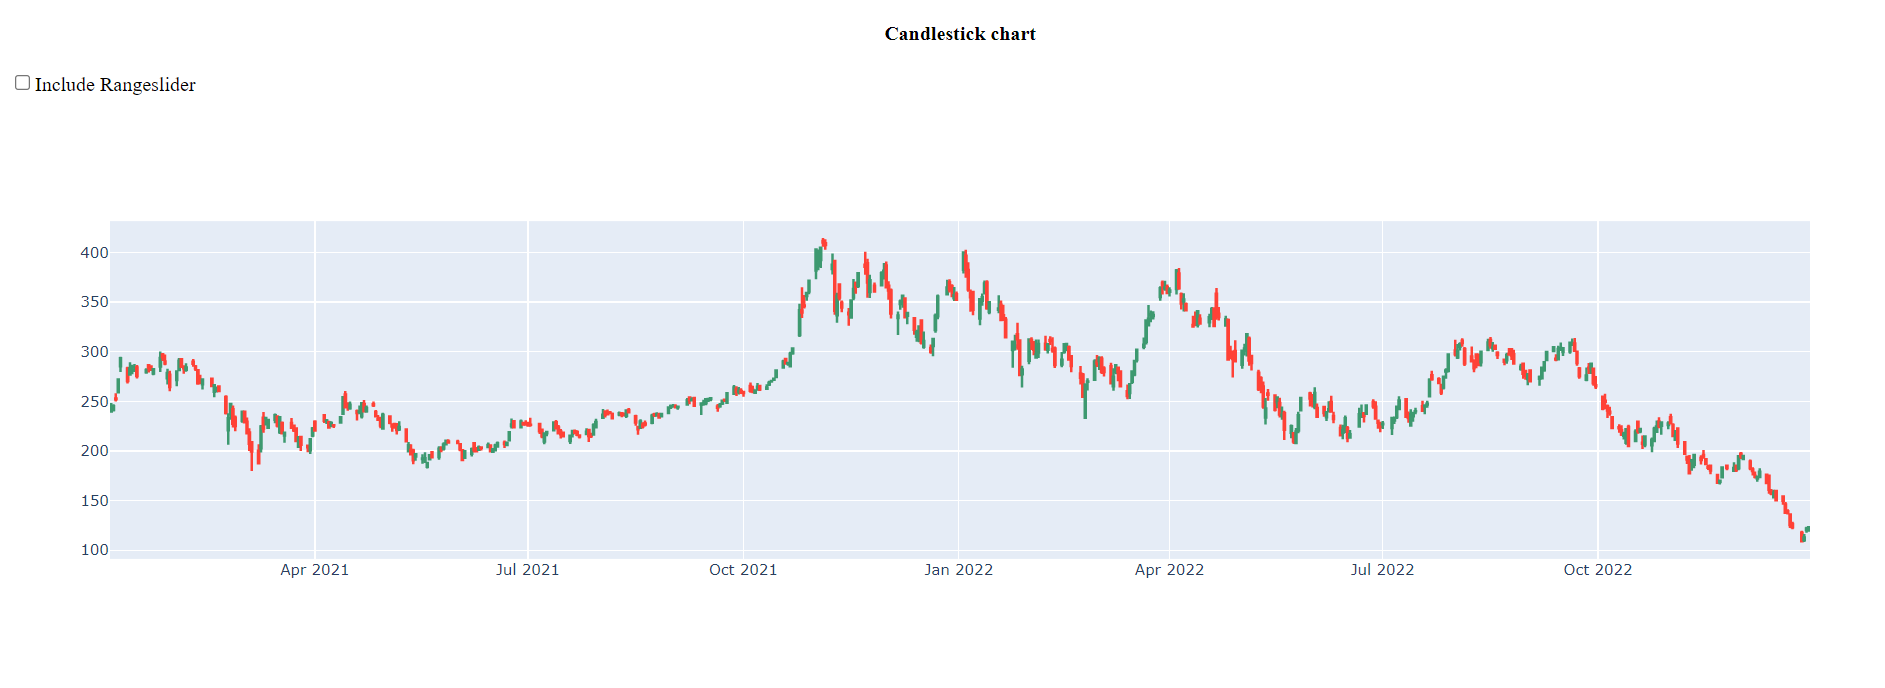

In [ ]:
#create lineplots and candlestick plot with dropdowns and checklist on Dash dashboard 

In [ ]:
class Interactive_StockPrices:
    
    #class constructor
    def __init__(self,df_tesla,df_ford):
        self.df_tesla=df_tesla
        self.df_ford=df_ford
        
    def Dash_Stocks(self):
        #create dash application
        app = JupyterDash(__name__)
        #to describe what app looks like we setup its layout
        #html.Div-our main container
        app.layout =html.Div([
            #html header
            html.H1('Open High Low and Close Stock Market Values in Dash',style={'text-align':'center'}),
            #html paragraph
            html.P("Select Ticker:"),
            #dash core components- dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            #to enable dropdowns in dash
            dcc.Dropdown(
                id = 'graph-type',
                #title
                placeholder='Select Stock',
                #options to choose from
                options= [
                    {'label' : 'Tesla', 'value' : 'Tesla'},
                    {'label' : 'Ford', 'value' : 'Ford'}
                ],
                #default value when app starts
                value="Tesla"
            ),
            # to render any plotly-powered data visualization
            dcc.Graph(
                id='graph'
            ),
            #to render set of checkbox
            dcc.Checklist(
                id='toggle-rangeslider',
                options=[{'label': 'Include Rangeslider', 
                          'value': 'slider'}],
                value=['slider'],
            ),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            html.P("Select Values:"),
            dcc.Checklist(
                #we define a list of options to choose from
                options=[
                    {"label": "Open", "value": "Open"},
                    {"label": "High", "value": "High"},
                    {"label": "Low", "value": "Low"},
                    {"label": "Close", "value": "Close"},
                ],
                value=["Open"],
                id="checklist",
            ),
        ])
        @app.callback(
            Output('graph', 'figure'),
            [Input('graph-type', 'value'),Input('checklist', 'value'),Input('toggle-rangeslider', 'value')]
        )
        def choose_graph_type(graph_type,checklist,rangeslider):
            if graph_type is None:
                raise dash.exceptions.PreventUpdate()
            if graph_type == 'Tesla':
                fig=px.line(df_from_db_tesla, x='Date', y=checklist)
                fig.update_layout(template="presentation",xaxis_rangeslider_visible='slider' in rangeslider)
                return fig
            elif graph_type == 'Ford':
                fig=px.line(df_from_db_ford, x='Date', y=checklist)
                fig.update_layout(template="presentation",xaxis_rangeslider_visible='slider' in rangeslider)
                return fig
            return None


        app.run_server(debug=True)

In [ ]:
ISP=Interactive_StockPrices(df_from_db_tesla,df_from_db_ford)

In [ ]:
ISP.Dash_Stocks()

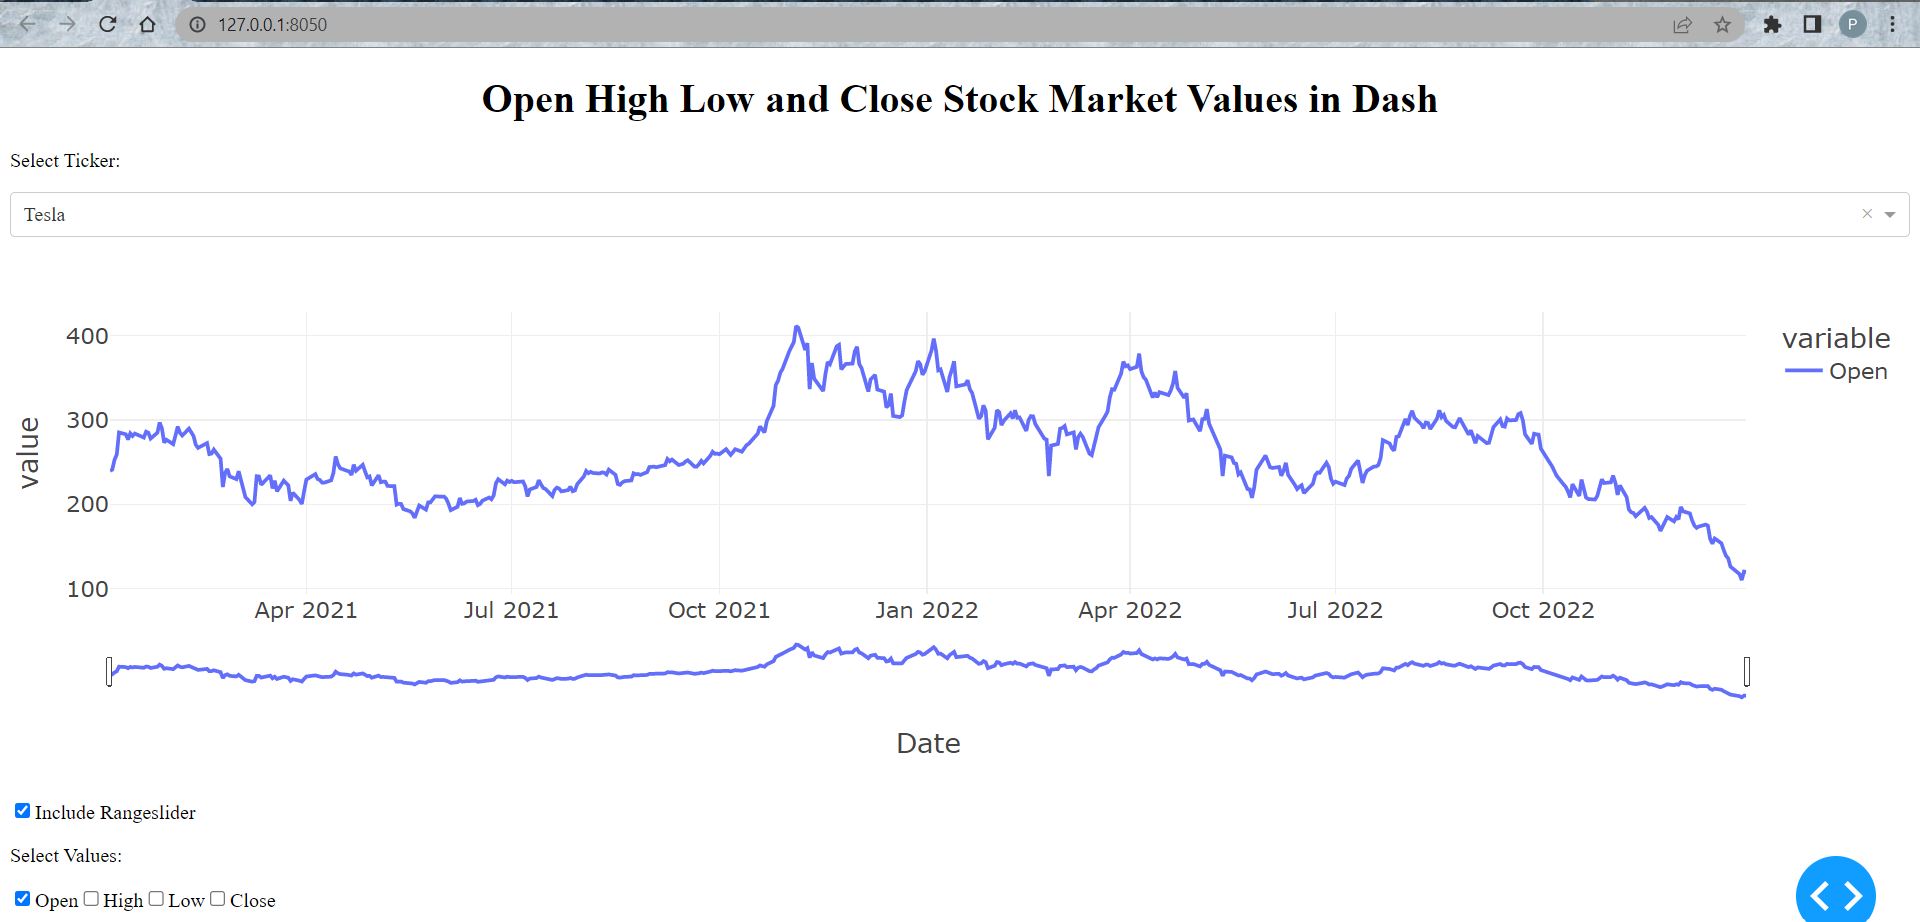


## Time Series Analysis

### Retrieve data from database

In [ ]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [ ]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [ ]:
import import_ipynb
import DEF_MFS_MVP_Storage as storage_module

In [ ]:
#define class object for mongoDB storage module class
mongoDB=storage_module.MongoDbAtlas()

In [ ]:
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#connect to tesla database and collection
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [ ]:
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [ ]:
df_from_db_tesla

### Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#plotly graphical object
import plotly.graph_objects as go
from matplotlib.pyplot import figure
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima.utils import ndiffs
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [ ]:
#import Time Series Analysis Module to main python module
import DEF_MFS_MVP_Timeseries_Analysis as timeseries_module

In [ ]:
#visualize timeseries plot in plotly
TS_visual=timeseries_module.TimeSeries_Visualization(df_from_db_tesla)

In [ ]:
TS_visual.line_plot()

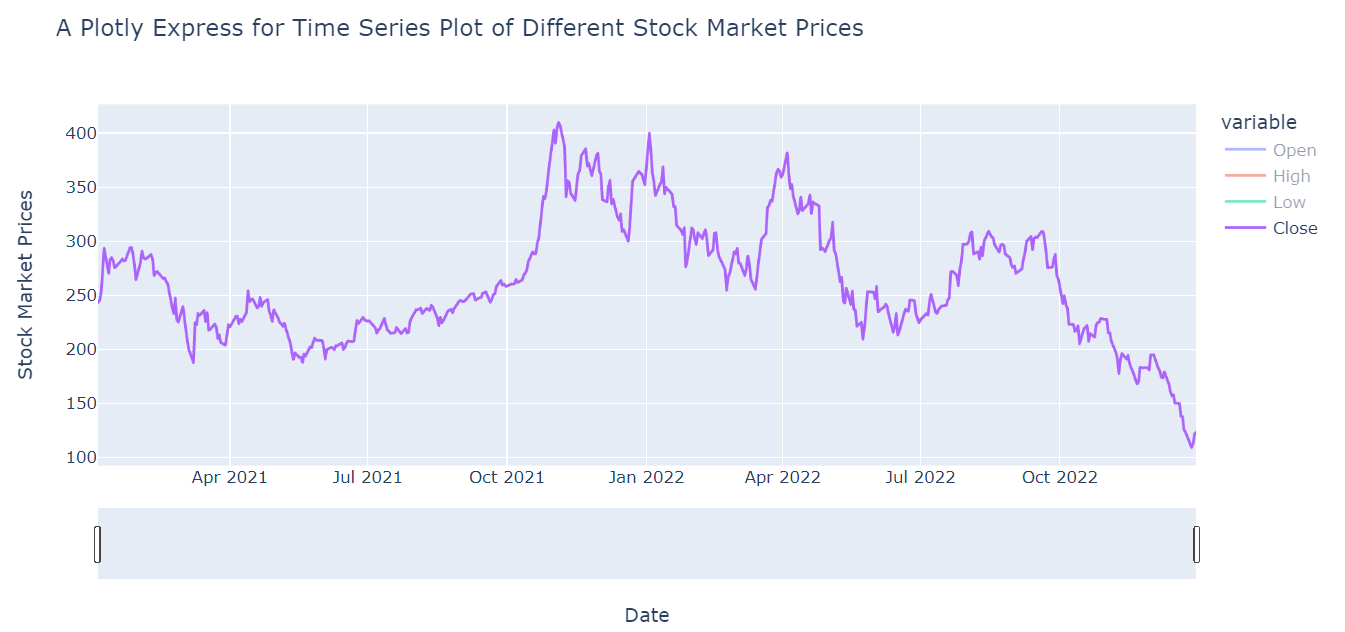

In [ ]:
#visualize as candlestick plot
TS_visual.candlestick_plot()

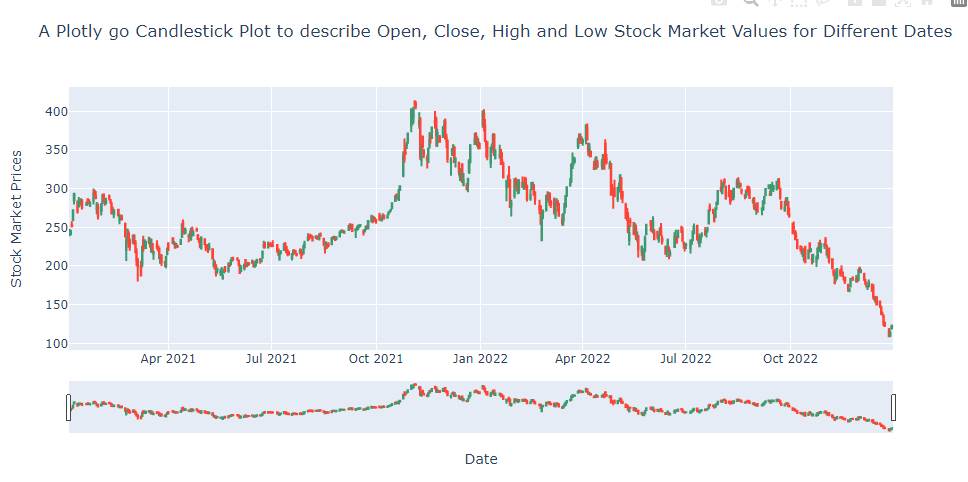

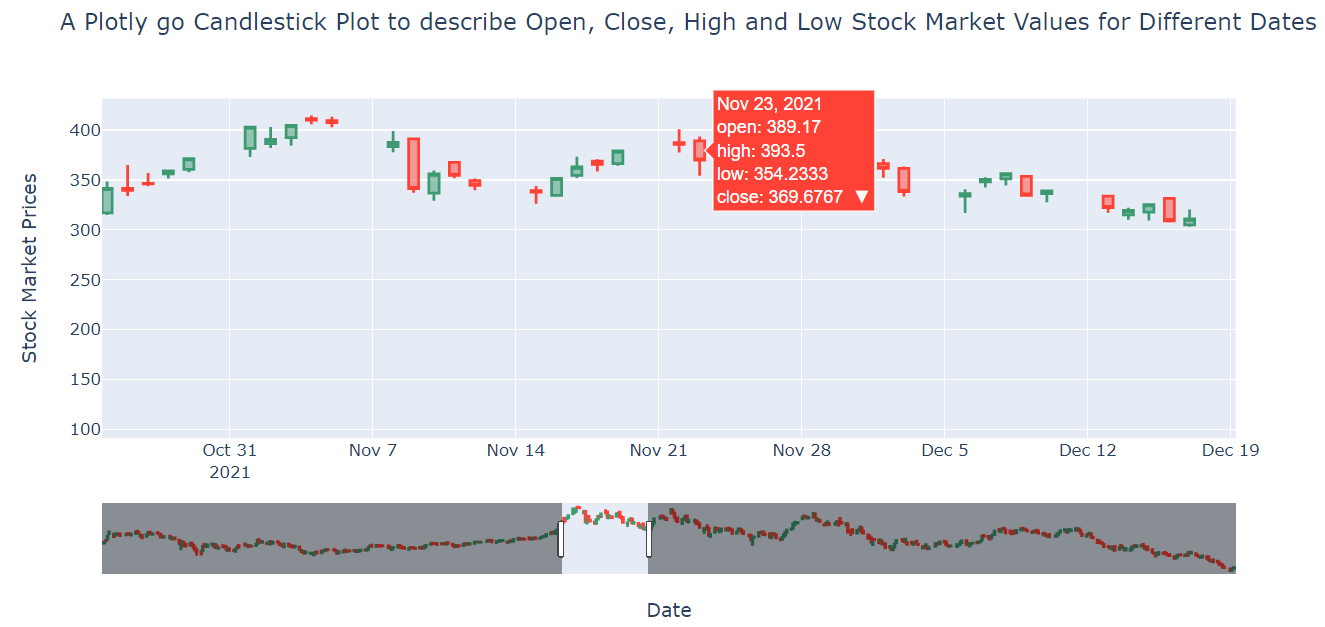

In [ ]:
TS_visual.OHLC_plot()

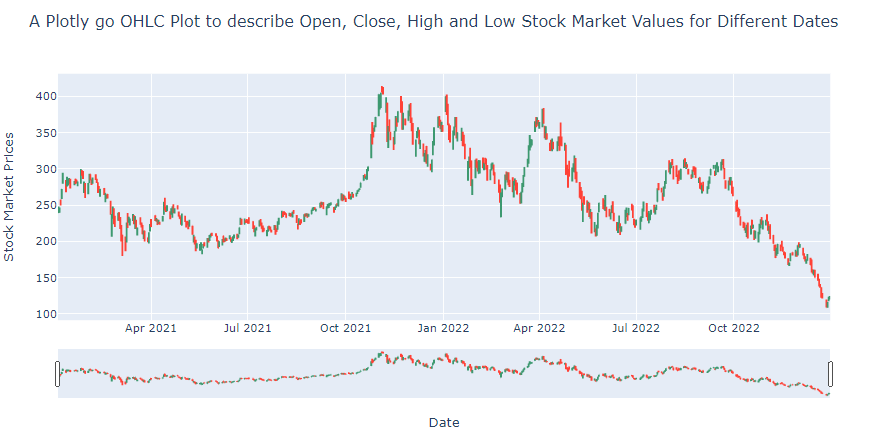

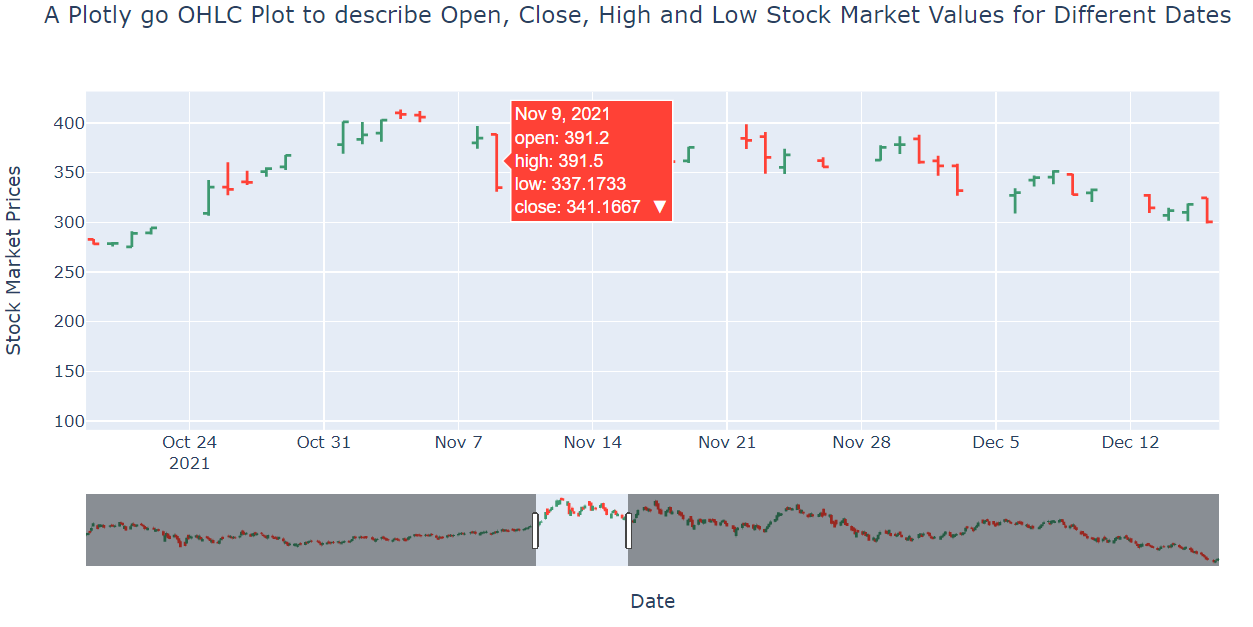

Our Target feature in Close Value, so we will be working on this

In [ ]:
df_tesla=df_tesla=df_from_db_tesla[["Date","Close"]]
#then we set date as our indext
df_tesla.set_index("Date",inplace=True)

In [ ]:
df_tesla

In [ ]:
#use TimeSeries_Analysis class to visualize seaonality, trends and autocorrelation
TS_analysis=timeseries_module.TimeSeries_Analysis(df_tesla)

In [ ]:
#decompose time series data into seasonal and trend
TS_analysis.additive_decomposition()

Our time series data has been decomposed into trend represented by orange, seasonality represented by blue and residual represented by green.

In [ ]:
#show auto correlationship between time series data
TS_analysis.autocorellationship()

This shows close auto correlationship between data.

In [ ]:
#use ARIMA_Analysis class to model time series data
arima=timeseries_module.ARIMA_Analysis(df_tesla)

In [ ]:
#determine if our time series data is stationary or not
arima.stationary_test()

In [ ]:
#determine order of differncing to make our time series data stationary
d=arima.Differencing_d()

Autocorrelation plot looks pretty similar for 1st and 2nd difference but lagging goes to far negative(-0.5) compared to 1st indicating over differencing. We we use order of diffrening df=1. Also pmdarima's ndiff library returns the value 1 to make our non statioary time series into stationary.

In [ ]:
p=arima.AutoRegressive_p()

   We can observe that PACF lag 3,4 and 7 is  above the significance line. So theye are significant. Also lag 7 is more significant so we choose p=7

In [ ]:
p=7

In [ ]:
arima.MovingAverage_q()

We can observe that forecast error 4 and 7 is  above the significance line. So theye are significant. Forecast error 4 may be suitable for this model so q=4.

In [ ]:
q=4

In [ ]:
arima.BuildModel(p,d,q)

In [ ]:
#show the residuals of the model
arima.ResidualErrors()

In [ ]:
#to plot prediction vs actual values
arima.Predictions()

## Time Series Forecasting

### Libraries

In [1]:
#to work with dataframe
import pandas as pd
#to perform mathematical and statistical calculations
import numpy as np
#DEAL WITH WARNINGS
import warnings
warnings.filterwarnings("ignore")
#to work with facebook prophet
from prophet import Prophet 
#represent data figuratively
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot,plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
#compute evaluation metrices
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score
import math

### Retrieve data from database

In [2]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [3]:
import import_ipynb
import DEF_MFS_MVP_Storage as storage_module

importing Jupyter notebook from DEF_MFS_MVP_Storage.ipynb


In [4]:
#define class object for mongoDB storage module class
mongoDB=storage_module.MongoDbAtlas()

In [5]:
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#connect to tesla database and collection
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [6]:
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

### Import DEF_MFS_MVP_Timeseries_Forcasting module to the main module

In [7]:
import import_ipynb
import DEF_MFS_MVP_Timeseries_Forcasting as forecast_module

importing Jupyter notebook from DEF_MFS_MVP_Timeseries_Forcasting.ipynb


In [8]:
#initiate class object to work with class methods
fb_prophet=forecast_module.Prophet_forecast(df_from_db_tesla)

### Feature Selection

For our target feature, we manually evaluated two features: "Open" and "Close," and chose "Close" as the winner because it allows us to capture more data due to its availability, has the ability to predict future prices, gives us a better understanding of how volatile the market is, and aids in identifying price trends. Due to the Close value's availability and dependability, it is the price at closing time. It shows how the stock performed in relation to the day's market tempo. In the absence of a likely after-hours trade, which has a minimal chance of occurring, the price for the next trading day's open value would be equal to the Close value.

Overall, we choose the Close feature since it is the most widely used technique in prediction tasks, and we feel that using close as our goal variable will improve the model's performance over other features.

In [9]:
#call class function to select target feature Close
fb_prophet.feature_selection("Close")

### Prophet Model Development

In [10]:
#renaming column names to match prophets requirement
fb_prophet.prophet_dataframe()

In [11]:
#splitting into training and testing set
fb_prophet.Train_Test_split()

In [12]:
#use prophet to make future dates and predictions for these future dates
fb_prophet.forecast_values()

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


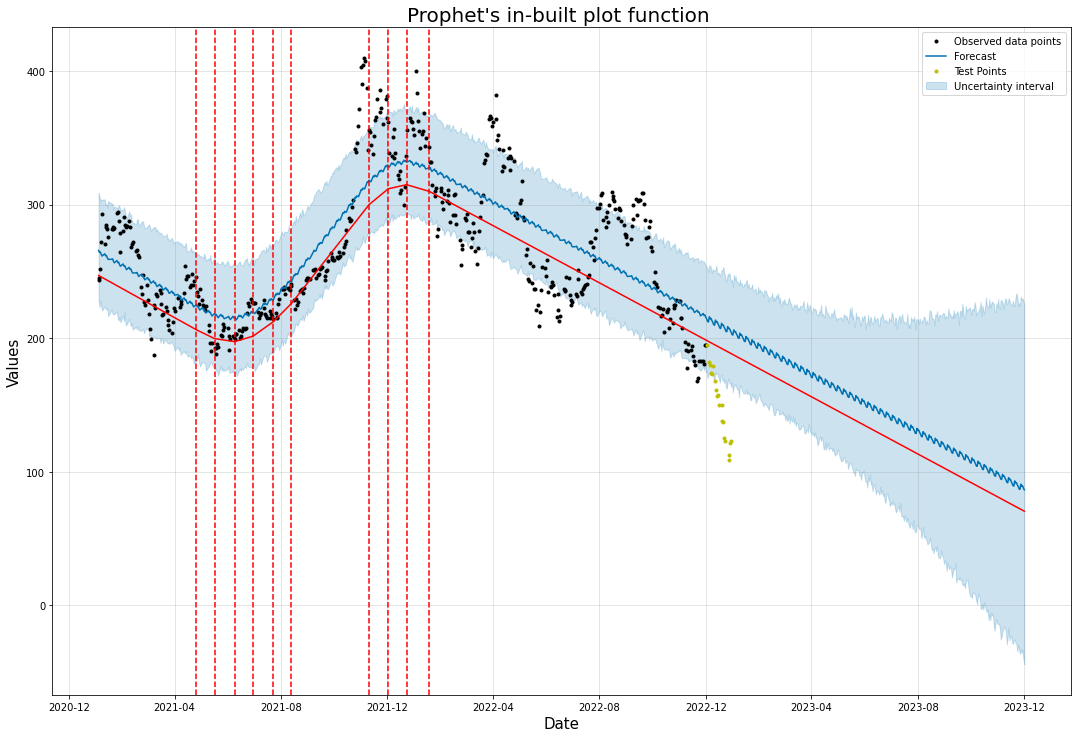

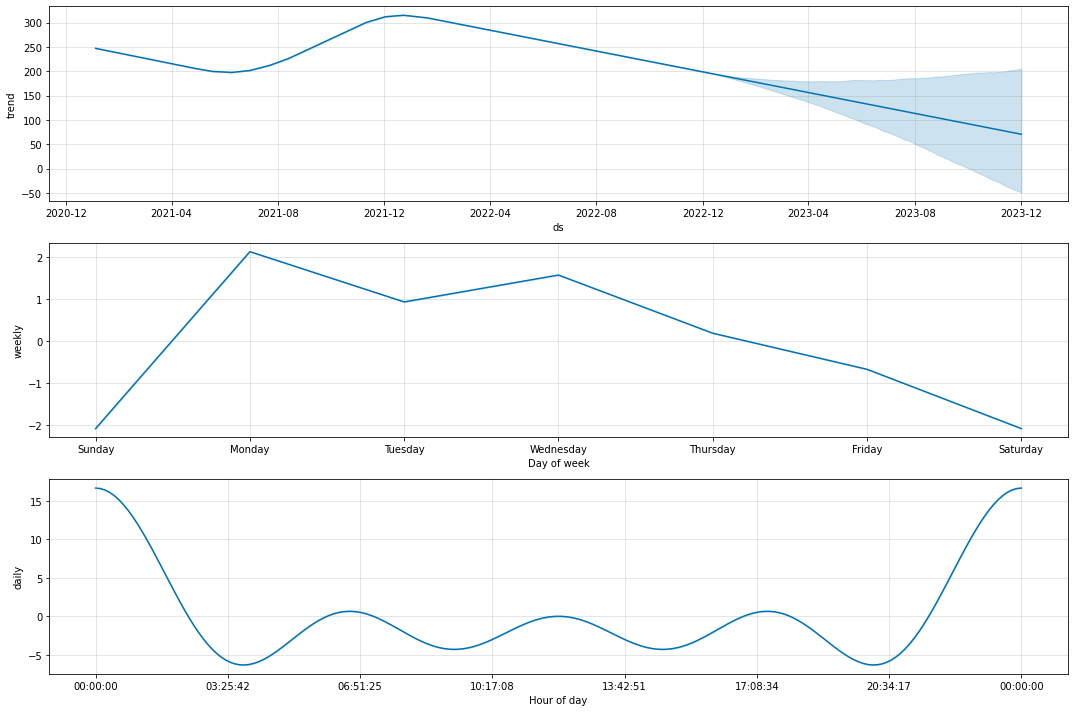

In [13]:
#plot forecasted value and components of forecasted value using Prophet's built-in function
fb_prophet.plot_prophet()

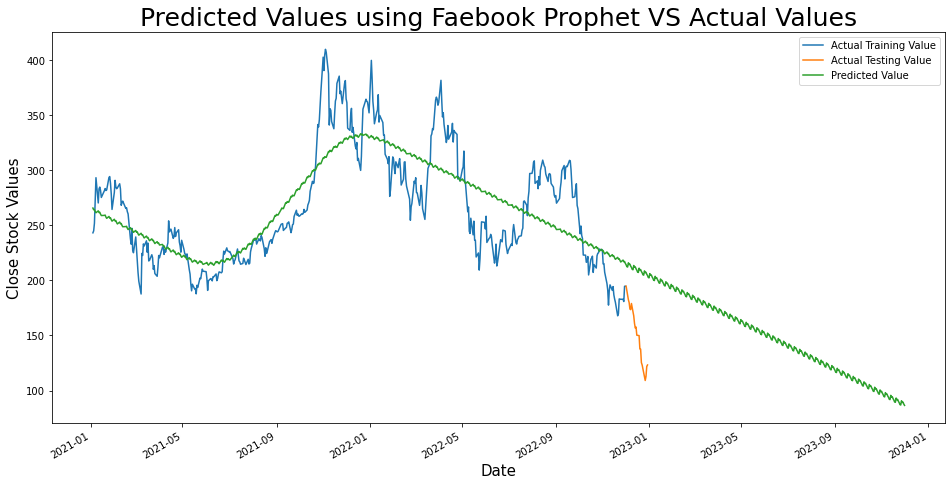

In [14]:
#Visualizing actual and predicted values using matplotlib
fb_prophet.prediction_visualization()

INFO:prophet:Making 8 forecasts with cutoffs between 2022-03-06 00:00:00 and 2022-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000024890D34DC0>


Cross Validation using Facebook Prophet


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-03-07,286.514164,260.825124,312.346510,268.193329,2022-03-06
1,2022-03-08,285.753545,260.167932,311.983284,274.799988,2022-03-06
2,2022-03-09,285.307432,258.892775,311.931205,286.323334,2022-03-06
3,2022-03-10,282.291125,256.078457,311.134973,279.433319,2022-03-06
4,2022-03-11,281.272807,254.956766,308.035629,265.116669,2022-03-06
...,...,...,...,...,...,...
328,2022-11-25,274.852264,237.922437,311.892925,182.860001,2022-10-02
329,2022-11-28,278.521810,241.545143,315.077992,182.919998,2022-10-02
330,2022-11-29,276.801775,239.438979,313.803247,180.830002,2022-10-02
331,2022-11-30,277.568248,238.638751,315.939199,194.699997,2022-10-02


Performance Metrices using Facebook Prophet


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,1266.474026,35.587554,31.175116,0.115878,0.126654,0.114945,0.646465
1,7 days,1355.136305,36.812176,32.329325,0.120774,0.128063,0.119513,0.606061
2,8 days,1447.887686,38.051119,33.625898,0.126969,0.128063,0.124623,0.545455
3,9 days,1660.523819,40.749525,36.094210,0.137671,0.142747,0.134929,0.494949
4,10 days,1787.617516,42.280226,37.225784,0.143087,0.154305,0.139918,0.454545
5,11 days,1824.918998,42.719071,37.125157,0.144033,0.142747,0.139738,0.454545
6,12 days,2054.548770,45.327131,39.551225,0.155124,0.170152,0.149940,0.351515
7,13 days,2251.144989,47.446233,42.001365,0.164688,0.185767,0.159299,0.292929
8,14 days,2430.130170,49.296350,43.718577,0.169185,0.182383,0.165010,0.272727
9,15 days,2597.201441,50.962746,45.599350,0.176229,0.182383,0.171482,0.242424


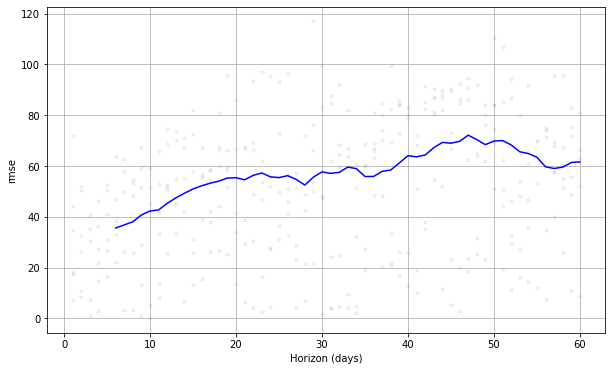

In [15]:
#evaluating models performance using Profet's built in cross-validation and performance evaluation function
fb_prophet.prophet_evaluation()

Predicted Values VS Actual Values for last 20 days of Fetched Stock Market Data


,ds,y,yhat
0,2022-12-02,194.860001,214.278852
1,2022-12-05,182.449997,216.032568
2,2022-12-06,179.820007,214.482209
3,2022-12-07,174.039993,214.771889
4,2022-12-08,173.440002,213.033111
5,2022-12-09,179.050003,211.820887
6,2022-12-12,167.820007,213.574604
7,2022-12-13,160.949997,212.024245
8,2022-12-14,156.800003,212.313925
9,2022-12-15,157.669998,210.575146


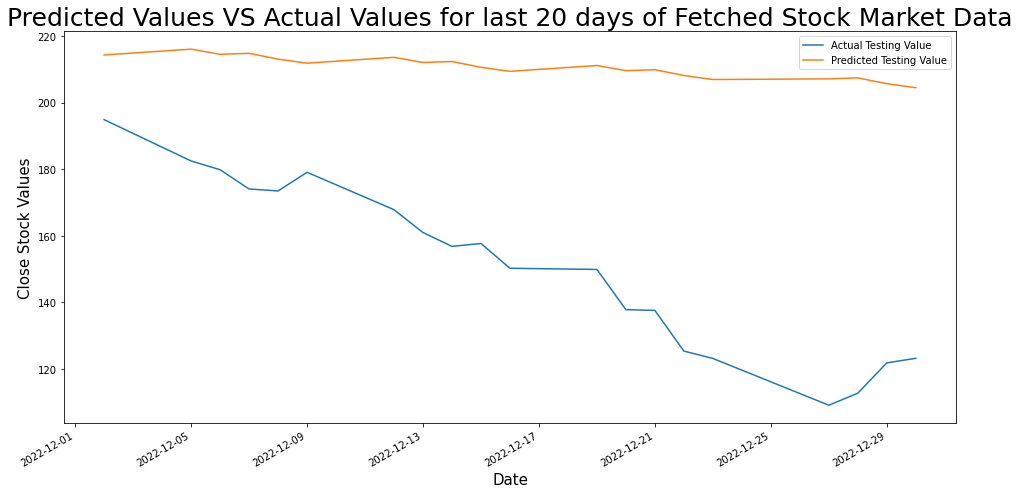

Predicted Values VS Actual Values of Fetched Stock Market Data


,ds,y,yhat
0,2021-01-04,243.256668,265.756912
1,2021-01-05,245.036667,264.194368
2,2021-01-06,251.993332,264.471863
3,2021-01-07,272.013336,262.720899
4,2021-01-08,293.339996,261.496491
...,...,...,...
498,2022-12-23,123.150002,206.904959
499,2022-12-27,109.099998,207.108316
500,2022-12-28,112.709999,207.397996
501,2022-12-29,121.820000,205.659217


In [16]:
#computing model performance for unseen 20 days data and overall data
df_20_eval,df_all_eval = fb_prophet.evaluation_metrices()

In [17]:
#evaluation metrices for 20 unseen data
df_20_eval

,Evaluation Metric,Values
0,MSE,4064.169535
1,RMSE,63.750839
2,MAE,59.738195
3,R2_Score,-5.419705


In [18]:
#evaluation metrices for entire dataset
df_all_eval

,Evaluation Metric,Values
0,MSE,1096.485056
1,RMSE,33.113216
2,MAE,27.067268
3,R2_Score,0.646838


In [20]:
model=fb_prophet.fbp

In [25]:
model.predict(pd.DataFrame({'ds':['2023-08-15']}))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-08-15,108.379539,83.990354,161.789861,108.379539,108.379539,17.61595,17.61595,17.61595,16.679056,16.679056,16.679056,0.936895,0.936895,0.936895,0.0,0.0,0.0,125.99549
